In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# load pytraj
import pytraj as pt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from umap import UMAP
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

### Domain Residue assignment
Assignment as per PDB - 5B2O (Protein - residues 1–1629;N995A) in complex with a 94-nt sgRNA, a 30-nt target DNA
strand, and a 9-nt non-target DNA strand (containing either the 50 -TGG-30 PAM or the 50 -TGA-30 PAM) at 1.7 A˚ resolutions
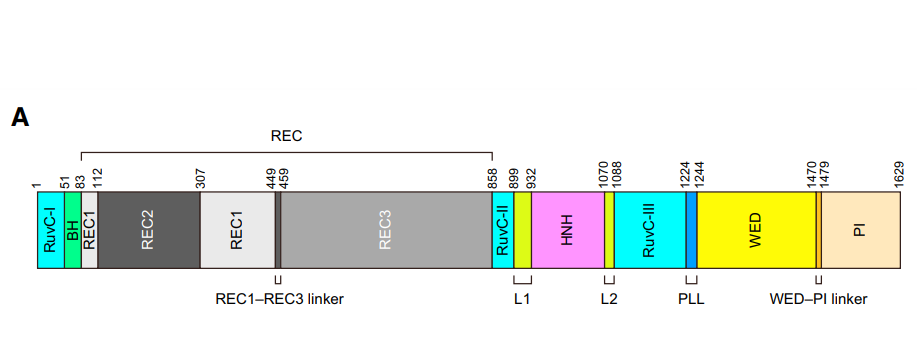

- In this study A995N muation is done. Protein starts from residue 1-1622 (protein), 1623-1715 (sgRNA), 1716 (Zn), 1717-1746 (tDNA), 1747-1764 (ntDNA)  

- RuvC- :1-51,858-899,1088-1224
- HNH - :932-1070
- Rec1 - :83-112,307-459,
- Rec2 - :112-307
- Rec3 - :459-858
- WED - :1224-1479
- PI - :1479-1622
- sgRNA(20bp) :1623-1642
- tDNA (20bp) :1745-1726
- ntDNA-tDNA (:1716-1725,1756-1764)

In [3]:
root_dir='/storage/gayatrip/gamd-amber-example/NII-work-2022/'
# load trajectory to memory
root_dir='/storage3/gayatrip'
# load trajectory to memory
root_dir='/storage3/gayatrip'
fn_traj=pt.load('/storage3/gayatrip/EMX1-Fn_native_rep/FnCas9_repeat_md_0-500ns_nowat.nc','/storage3/gayatrip/EMX1-Fn_native_rep/5b2o_emx1_nat_nowat_noNA.prmtop')
fnmm20_traj = pt.load('/storage3/gayatrip/EMX1-Fn_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_0-500ns.nc', '/storage3/gayatrip/EMX1-Fn_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_noNA.prmtop') # 500ps, 15000 frames
fnmm16_19_traj= pt.load('/storage3/gayatrip/EMX1_Fn_mm16_19/5b2o_mm16_19_emx1_duplex_nowat_0-500ns.nc', '/storage3/gayatrip/EMX1_Fn_mm16_19/5b2o_mm16_19_nowat_noNA.prmtop')
fnmm17_20_traj = pt.load('/storage3/gayatrip/EMX1-Fn_mm17-20/5b2omm17-20_emx1_duplex_nowat_0-500ns.nc', '/storage3/gayatrip/EMX1-Fn_mm17-20/5b2omm17-20_emx1_nowat_noNA.prmtop') # 500ps, 15000 frames


In [3]:
fn_rmsd= list(pt.rmsd(fn_traj, ref=0, mask='@C,CA,N,O'))
fnmm20_rmsd= list(pt.rmsd(fnmm20_traj, ref=0, mask='@C,CA,N,O'))
fnmm16_19_rmsd= list(pt.rmsd(fnmm16_19_traj, ref=0, mask='@C,CA,N,O'))
fnmm17_20_rmsd= list(pt.rmsd(fnmm17_20_traj , ref=0, mask='@C,CA,N,O'))

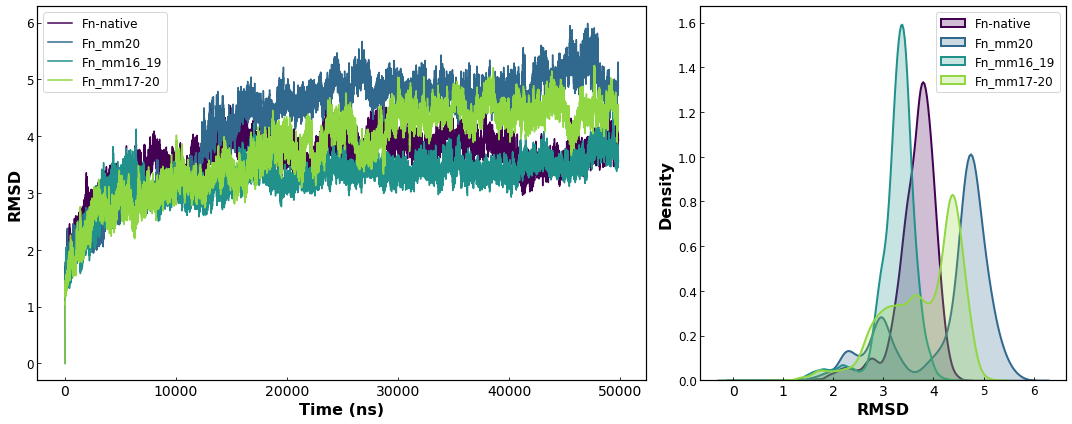

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data_rmsd_fn = pd.DataFrame(list(zip(fn_rmsd, fnmm20_rmsd, fnmm16_19_rmsd, fnmm17_20_rmsd)),
                            columns=['RMSD_fn_native', 'RMSD_fn_mm20', 'RMSD_fn_mm16_19', 'RMSD_fn_mm17-20'])

# Create the main plot using gridfnec
color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_fn.plot(ax=ax1, color=color_dict)
plt.legend(['Fn-native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_fn['RMSD_fn_native'], ax=ax2, color=color_dict[0], label='Fn-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_fn_mm20'], ax=ax2, color=color_dict[1], label='Fn_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_fn_mm16_19'], ax=ax2, color=color_dict[2], label='Fn_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_fn_mm17-20'], ax=ax2, color=color_dict[3], label='Fn_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()

plt.savefig('figures/FnCas9_all_RMSD-prot_with_density_subplot.svg')
plt.show()


In [8]:
data_rmsd_fn=data_rmsd_fn.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rmsd_fn.columns=['Label','RMSD']
data_rmsd_fn.to_csv('nodt_csvs/FnCas9_all-hybrid_RMSD_protein.csv', index=False)
data_rmsd_fn.head()

,Label,RMSD
398607,RMSD,3.303877
164511,RMSD,4.598129
316359,RMSD,3.816991
164497,RMSD,5.141706
164499,RMSD,2.542876


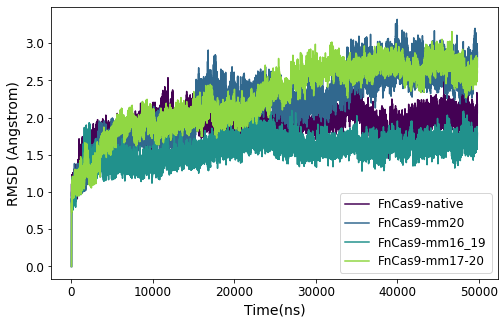

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
fn_dup_rmsd=list(pt.rmsd(fn_traj, ref=0, mask=':1624-1643,1726-1745'))
fnmm20_dup_rmsd=list(pt.rmsd(fnmm20_traj, ref=0, mask=':1624-1643,1726-1745'))
fnmm16_19_dup_rmsd=list(pt.rmsd(fnmm16_19_traj, ref=0, mask=':1624-1643,1726-1745'))
fnmm17_20_dup_rmsd=list(pt.rmsd(fnmm17_20_traj, ref=0, mask=':1624-1643,1726-1745'))
dup_rmsd=pd.DataFrame(list(zip(fn_dup_rmsd,fnmm20_dup_rmsd,fnmm16_19_dup_rmsd,fnmm17_20_dup_rmsd)), columns=['Fn_native','Fn_mm20','Fn_mm16_19','Fn_mm17-20'])

# #color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
# color_dict=['#440154','#31688e','#21918c','#90d743']
dup_rmsd.plot(color=color_dict)
plt.legend(['FnCas9-native','FnCas9-mm20','FnCas9-mm16_19','FnCas9-mm17-20'],fontsize=12)
plt.ylabel('RMSD (Angstrom)', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
#plt.title('Backbone after lsq fit to Backbone')
plt.gcf().set_size_inches(8, 5)

In [10]:
dup_rmsd=dup_rmsd.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
dup_rmsd.columns=['Label','RMSD']
dup_rmsd.to_csv('nodt_csvs/FnCas9_all-hybrid_RMSD_duplex.csv', index=False)
dup_rmsd.head()

,Label,RMSD
0,Fn_native,3.361260e-07
93000,Fn_native,1.795401e+00
93028,Fn_native,1.768928e+00
93024,Fn_native,1.825654e+00
93020,Fn_native,1.893264e+00


In [ ]:
# calculate rmsd with reference as 0-th frame, backbone heavy atoms
fn_rmsd_first= list(pt.rmsd(fn_traj, ref=0, mask='@C,CA,N,O'))
fn_rg = list(pt.radgyr(fn_traj, mask='@CA'))
#fn_rmsf=list(pt.rmsf(fn_traj,'@CA'))
fn_sec=list(pt.dssp(fn_traj, ":1-1622"))
fn_surf=list(pt.molsurf(fn_traj, '@C,CA,N,O'))
fn_prot = list(pt.search_hbonds(fn_traj, ':1-1622'))
res_fn, ss_fn, _ = list(pt.dssp(fn_traj, simplified=True))
#print(data_rmsd_first)

fnmm20_rmsd_first= list(pt.rmsd(fnmm20_traj, ref=0, mask='@C,CA,N,O'))
fnmm20_rg = list(pt.radgyr(fnmm20_traj, mask='@CA'))
#fnmm20_rmsf=list(pt.rmsf(fnmm20_traj,'@CA'))
fnmm20_sec=list(pt.dssp(fnmm20_traj, ":1-1622"))
fnmm20_surf=list(pt.molsurf(fnmm20_traj, '@C,CA,N,O'))
fnmm20_prot = list(pt.search_hbonds(fnmm20_traj, ':1-1622'))
res_fnmm20, ss_fnmm20, _ = list(pt.dssp(fnmm20_traj, simplified=True))

fnmm16_19_rmsd_first= list(pt.rmsd(fnmm16_19_traj, ref=0, mask='@C,CA,N,O'))
fnmm16_19_rg = list(pt.radgyr(fnmm16_19_traj, mask='@CA'))
fnmm16_19_sec=list(pt.dssp(fnmm16_19_traj, ":1-1622"))
fnmm16_19_surf=list(pt.molsurf(fnmm16_19_traj, '@C,CA,N,O'))
fnmm16_19_prot = list(pt.search_hbonds(fnmm16_19_traj, ':1-1622'))
res_fnmm16_19, ss_fnmm16_19, _ = list(pt.dssp(fnmm16_19_traj, simplified=True))

fnmm17_20_rmsd_first= list(pt.rmsd(fnmm17_20_traj, ref=0, mask='@C,CA,N,O'))
fnmm17_20_rg = list(pt.radgyr(fnmm17_20_traj, mask='@CA'))
fnmm17_20_sec=list(pt.dssp(fnmm17_20_traj, ":1-1622"))
fnmm17_20_surf=list(pt.molsurf(fnmm17_20_traj, '@C,CA,N,O'))
fnmm17_20_prot = list(pt.search_hbonds(fnmm17_20_traj, ':1-1622'))
res_fnmm17_20, ss_fnmm17_20, _ = list(pt.dssp(fnmm17_20_traj, simplified=True))

In [ ]:
import pandas as pd # 
data_rmsd_first=pd.DataFrame(list(zip(fn_rmsd_first,fnmm20_rmsd_first,fnmm16_19_rmsd_first,fnmm17_20_rmsd_first)), columns=['RMSD_fn_native','RMSD_fn_mm20','RMSD_fn_mm16-19','RMSD_fn_mm17-20'])
data_rg = pd.DataFrame(list(zip(fn_rg,fnmm20_rg,fnmm16_19_rg,fnmm17_20_rg)), columns=['ROG_fn_native','ROG_fn_mm20','ROG_fn_mm16-19','ROG_fn_mm17-20'])
#data_rmsf=pd.DataFrame(list(zip(fn_rmsf.T,fnmm20_rmsf.T)), columns=['RMSF_fn_native','RMSF_fn_mm20'])
data_sec=pd.DataFrame(list(zip(fn_sec,fnmm20_sec,fnmm16_19_sec,fnmm17_20_sec)), columns=['Sec_fn_native','Sec_fn_mm20','Sec_fn_mm16-19','Sec_fn_mm17-20'])
data_surf=pd.DataFrame(list(zip(fn_surf,fnmm20_surf,fnmm16_19_surf,fnmm17_20_surf)), columns=['SASA_fn_native','SASA_fn_mm20','SASA_fn_mm16-19','SASA_fn_mm17-20'])
data_prot = pd.DataFrame(list(zip(fn_prot,fnmm20_prot,fnmm16_19_prot,fnmm17_20_prot)), columns=['Hbonds_fn_native','Hbonds_fn_mm20','Hbonds_fn_mm16-19','Hbonds_fn_mm17-20'])
data_prot.head()

## Analysis using trajectory with dt

In [3]:
# load trajectory to memory
traj1=pt.load('/storage3/gayatrip/EMX1-Fn_native_rep/FnCas9_repeat_md_0-500ns_nowat_500frames.nc','/storage3/gayatrip/EMX1-Fn_native_rep/5b2o_emx1_nat_nowat_noNA.prmtop')
traj2 = pt.load('/storage3/gayatrip/EMX1-Fn_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1-Fn_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_noNA.prmtop') # 500ps, 15000 frames
traj3= pt.load('/storage3/gayatrip/EMX1_Fn_mm16_19/5b2o_mm16_19_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1_Fn_mm16_19/5b2o_mm16_19_nowat_noNA.prmtop')
traj4= pt.load('/storage3/gayatrip/EMX1-Fn_mm17-20/5b2omm17-20_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1-Fn_mm17-20/5b2omm17-20_emx1_nowat_noNA.prmtop') # 500ps, 15000 frames


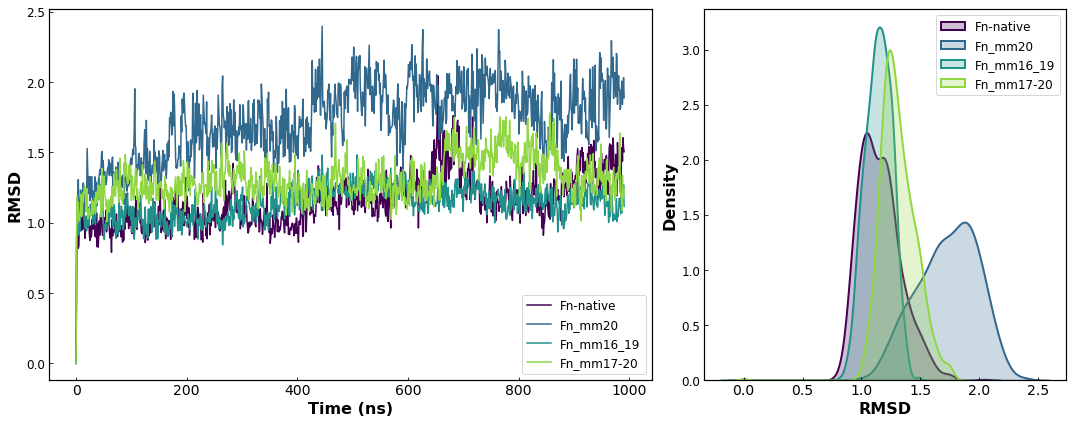

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
fn_dup_rmsd=list(pt.rmsd(traj1, ref=0, mask=':1624-1643,1726-1745'))
fnmm20_dup_rmsd=list(pt.rmsd(traj2, ref=0, mask=':1624-1643,1726-1745'))
fnmm16_19_dup_rmsd=list(pt.rmsd(traj3, ref=0, mask=':1624-1643,1726-1745'))
fnmm17_20_dup_rmsd=list(pt.rmsd(traj4, ref=0, mask=':1624-1643,1726-1745'))
dup_rmsd=pd.DataFrame(list(zip(fn_dup_rmsd,fnmm20_dup_rmsd,fnmm16_19_dup_rmsd,fnmm17_20_dup_rmsd)), columns=['Fn_native','Fn_mm20','Fn_mm16_19','Fn_mm17-20'])

color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
dup_rmsd.plot(ax=ax1, color=color_dict)
plt.legend(['Fn-native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=dup_rmsd['Fn_native'], ax=ax2, color=color_dict[0], label='Fn-native', fill=True,linewidth=2)
sns.kdeplot(data=dup_rmsd['Fn_mm20'], ax=ax2, color=color_dict[1], label='Fn_mm20', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['Fn_mm16_19'], ax=ax2, color=color_dict[2], label='Fn_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['Fn_mm17-20'], ax=ax2, color=color_dict[3], label='Fn_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/FnCas9_all_RMSD-duplex_with_density-stable-part_subplot.svg')
plt.show()

In [ ]:
dup_rmsd_save=dup_rmsd.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
dup_rmsd_save.columns=['Label','RMSD']
dup_rmsd_save.to_csv('FnCas9_all-hybrid_RMSD.csv', index=False)
dup_rmsd_save.head()

In [12]:
# calculate rmsd with reference as 0-th frame, backbone heavy atoms
fn_rmsd_first= list(pt.rmsd(traj1, ref=0, mask='@C,CA,N,O'))
fn_rg = list(pt.radgyr(traj1, mask='@CA'))
#fn_rmsf=list(pt.rmsf(traj1,'@CA'))
fn_sec=list(pt.dssp(traj1, ":1-1622"))
fn_surf=list(pt.molsurf(traj1, '@C,CA,N,O'))
fn_prot = list(pt.search_hbonds(traj1, ':1-1622'))
res_fn, ss_fn, _ = list(pt.dssp(traj1, simplified=True))
#print(data_rmsd_first)

fnmm20_rmsd_first= list(pt.rmsd(traj2, ref=0, mask='@C,CA,N,O'))
fnmm20_rg = list(pt.radgyr(traj2, mask='@CA'))
#fnmm20_rmsf=list(pt.rmsf(traj2,'@CA'))
fnmm20_sec=list(pt.dssp(traj2, ":1-1622"))
fnmm20_surf=list(pt.molsurf(traj2, '@C,CA,N,O'))
fnmm20_prot = list(pt.search_hbonds(traj2, ':1-1622'))
res_fnmm20, ss_fnmm20, _ = list(pt.dssp(traj2, simplified=True))

fnmm16_19_rmsd_first= list(pt.rmsd(traj3, ref=0, mask='@C,CA,N,O'))
fnmm16_19_rg = list(pt.radgyr(traj3, mask='@CA'))
fnmm16_19_sec=list(pt.dssp(traj3, ":1-1622"))
fnmm16_19_surf=list(pt.molsurf(traj3, '@C,CA,N,O'))
fnmm16_19_prot = list(pt.search_hbonds(traj3, ':1-1622'))
res_fnmm16_19, ss_fnmm16_19, _ = list(pt.dssp(traj3, simplified=True))

In [13]:
fnmm17_20_rmsd_first= list(pt.rmsd(traj4, ref=0, mask='@C,CA,N,O'))
fnmm17_20_rg = list(pt.radgyr(traj4, mask='@CA'))
fnmm17_20_sec=list(pt.dssp(traj4, ":1-1622"))
fnmm17_20_surf=list(pt.molsurf(traj4, '@C,CA,N,O'))
fnmm17_20_prot = list(pt.search_hbonds(traj4, ':1-1622'))
res_fnmm17_20, ss_fnmm17_20, _ = list(pt.dssp(traj4, simplified=True))

In [5]:
## ROG domain wise
# RuvC- :1-51,858-899,1088-1224
# HNH - :932-1070
# Rec1 - :83-112,307-459,
# Rec2 - :112-307
# Rec3 - :459-858
# WED - :1224-1479
#PI - :1479-1622
# sgRNA(20bp) :1623-1642
# tDNA (20bp) :1745-1726
# ntDNA-tDNA (:1716-1725,1756-1764)

fn_rg_ruvc = list(pt.radgyr(traj1, mask=':1-51,858-899,1088-1224'))
fnmm20_rg_ruvc = list(pt.radgyr(traj2, mask=':1-51,858-899,1088-1224'))
fnmm16_19_rg_ruvc = list(pt.radgyr(traj3, mask=':1-51,858-899,1088-1224'))
fnmm17_20_rg_ruvc = list(pt.radgyr(traj4, mask=':1-51,858-899,1088-1224'))

fn_rg_hnh = list(pt.radgyr(traj1, mask=':932-1070'))
fnmm20_rg_hnh = list(pt.radgyr(traj2, mask=':932-1070'))
fnmm16_19_rg_hnh = list(pt.radgyr(traj3, mask=':932-1070'))
fnmm17_20_rg_hnh = list(pt.radgyr(traj4, mask=':932-1070'))

fn_rg_rec1= list(pt.radgyr(traj1, mask=':83-112,307-459'))
fnmm20_rg_rec1= list(pt.radgyr(traj2, mask=':83-112,307-459'))
fnmm16_19_rg_rec1= list(pt.radgyr(traj3, mask=':83-112,307-459'))
fnmm17_20_rg_rec1= list(pt.radgyr(traj4, mask=':83-112,307-459'))

fn_rg_rec2= list(pt.radgyr(traj1, mask=':112-307'))
fnmm20_rg_rec2= list(pt.radgyr(traj2, mask=':112-307'))
fnmm16_19_rg_rec2= list(pt.radgyr(traj3, mask=':112-307'))
fnmm17_20_rg_rec2= list(pt.radgyr(traj4, mask=':112-307'))

fn_rg_rec3= list(pt.radgyr(traj1, mask=':459-858'))
fnmm20_rg_rec3= list(pt.radgyr(traj2, mask=':459-858'))
fnmm16_19_rg_rec3= list(pt.radgyr(traj3, mask=':459-858'))
fnmm17_20_rg_rec3= list(pt.radgyr(traj4, mask=':459-858'))

fn_rg_wed= list(pt.radgyr(traj1, mask=':1224-1479'))
fnmm20_rg_wed= list(pt.radgyr(traj2, mask=':1224-1479'))
fnmm16_19_rg_wed= list(pt.radgyr(traj3, mask=':1224-1479'))
fnmm17_20_rg_wed= list(pt.radgyr(traj4, mask=':1224-1479'))

fn_rg_pi= list(pt.radgyr(traj1, mask=':1479-1622'))
fnmm20_rg_pi= list(pt.radgyr(traj2, mask=':1479-1622'))
fnmm16_19_rg_pi= list(pt.radgyr(traj3, mask=':1479-1622'))
fnmm17_20_rg_pi= list(pt.radgyr(traj4, mask=':1479-1622'))

data_rg_ruvc = pd.DataFrame(list(zip(fn_rg_ruvc,fnmm20_rg_ruvc,fnmm16_19_rg_ruvc,fnmm17_20_rg_ruvc)), columns=['Fn_native-RuvC','Fn_mm20-RuvC','Fn_mm16-19-RuvC','Fn_mm17-20-RuvC'])
data_rg_hnh = pd.DataFrame(list(zip(fn_rg_hnh,fnmm20_rg_hnh,fnmm16_19_rg_hnh,fnmm17_20_rg_hnh)), columns=['Fn_native-HNH','Fn_mm20-HNH','Fn_mm16-19-HNH','Fn_mm17-20-HNH'])
data_rg_rec1 = pd.DataFrame(list(zip(fn_rg_rec1,fnmm20_rg_rec1,fnmm16_19_rg_rec1,fnmm17_20_rg_rec1)), columns=['Fn_native-REC1','Fn_mm20-REC1','Fn_mm16-19-REC1','Fn_mm17-20-REC1'])
data_rg_rec2 = pd.DataFrame(list(zip(fn_rg_rec2,fnmm20_rg_rec2,fnmm16_19_rg_rec2,fnmm17_20_rg_rec2)), columns=['Fn_native-REC2','Fn_mm20-REC2','Fn_mm16-19-REC2','Fn_mm17-20-REC2'])
data_rg_rec3 = pd.DataFrame(list(zip(fn_rg_rec3,fnmm20_rg_rec3,fnmm16_19_rg_rec3,fnmm17_20_rg_rec3)), columns=['Fn_native-REC3','Fn_mm20-REC3','Fn_mm16-19-REC3','Fn_mm17-20-REC3'])
data_rg_wed = pd.DataFrame(list(zip(fn_rg_wed,fnmm20_rg_wed,fnmm16_19_rg_wed,fnmm17_20_rg_wed)), columns=['Fn_native-WED','Fn_mm20-WED','Fn_mm16-19-WED','Fn_mm17-20-WED'])
data_rg_pi = pd.DataFrame(list(zip(fn_rg_pi,fnmm20_rg_pi,fnmm16_19_rg_pi,fnmm17_20_rg_pi)), columns=['Fn_native-PI','Fn_mm20-PI','Fn_mm16-19-PI','Fn_mm17-20-PI'])

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

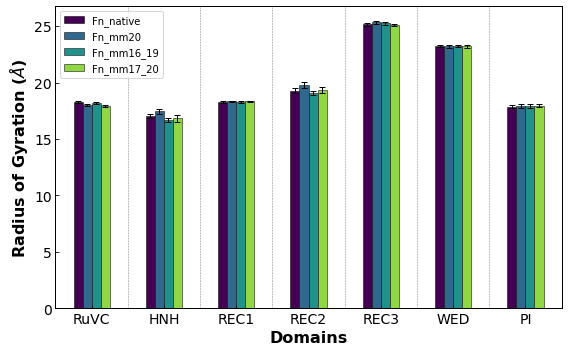

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes with mean and std dev values of ROG of every domain
df_mean = pd.DataFrame([['RuVC', 18.28, 18.01, 18.17, 17.96], ['HNH', 17.04, 17.46, 16.69, 16.82], ['REC1', 18.28, 18.34, 18.26, 18.33],
['REC2', 19.29, 19.78, 19.07, 19.32], ['REC3', 25.17, 25.34, 25.24, 25.08], ['WED', 23.25, 23.20, 23.24, 23.21], ['PI',17.88, 17.91,17.94,17.97]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20']) 

df_std=pd.DataFrame([['RuVC', 0.085, 0.079, 0.101, 0.079], ['HNH', 0.17, 0.21, 0.19, 0.29], ['REC1',0.081, 0.068, 0.077, 0.080],
['REC2',0.207, 0.300 , 0.209, 0.257], ['REC3',0.129, 0.138, 0.099, 0.106], ['WED',  0.089,  0.101,0.088, 0.122], ['PI',0.151, 0.152,0.175,0.145]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20'])
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

color_dict=['#440154','#31688e','#21918c','#90d743']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(8,5),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('Radius of Gyration ($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('figures/FnCas9_all_domain-wise-ROG_stable-part.svg')
plt.show()

In [73]:
## ROG domain wise

fn_rmsf_ruvc = list(pt.rmsf(traj1, mask=':1-51,858-899,1088-1224', options='byres').T[1])
fnmm20_rmsf_ruvc = list(pt.rmsf(traj2, mask=':1-51,858-899,1088-1224', options='byres').T[1])
fnmm16_19_rmsf_ruvc = list(pt.rmsf(traj3, mask=':1-51,858-899,1088-1224', options='byres').T[1])
fnmm17_20_rmsf_ruvc = list(pt.rmsf(traj4, mask=':1-51,858-899,1088-1224', options='byres').T[1])

fn_rmsf_hnh = list(pt.rmsf(traj1, mask=':932-1070', options='byres').T[1])
fnmm20_rmsf_hnh = list(pt.rmsf(traj2, mask=':932-1070', options='byres').T[1])
fnmm16_19_rmsf_hnh = list(pt.rmsf(traj3, mask=':932-1070', options='byres').T[1])
fnmm17_20_rmsf_hnh = list(pt.rmsf(traj4, mask=':932-1070', options='byres').T[1])

fn_rmsf_rec1= list(pt.rmsf(traj1, mask=':83-112,307-459', options='byres').T[1])
fnmm20_rmsf_rec1= list(pt.rmsf(traj2, mask=':83-112,307-459', options='byres').T[1])
fnmm16_19_rmsf_rec1= list(pt.rmsf(traj3, mask=':83-112,307-459', options='byres').T[1])
fnmm17_20_rmsf_rec1= list(pt.rmsf(traj4, mask=':83-112,307-459', options='byres').T[1])

fn_rmsf_rec2= list(pt.rmsf(traj1, mask=':112-307', options='byres').T[1])
fnmm20_rmsf_rec2= list(pt.rmsf(traj2, mask=':112-307', options='byres').T[1])
fnmm16_19_rmsf_rec2= list(pt.rmsf(traj3, mask=':112-307', options='byres').T[1])
fnmm17_20_rmsf_rec2= list(pt.rmsf(traj4, mask=':112-307', options='byres').T[1])

fn_rmsf_rec3= list(pt.rmsf(traj1, mask=':459-858', options='byres').T[1])
fnmm20_rmsf_rec3=list( pt.rmsf(traj2, mask=':459-858', options='byres').T[1])
fnmm16_19_rmsf_rec3= list(pt.rmsf(traj3, mask=':459-858', options='byres').T[1])
fnmm17_20_rmsf_rec3= list(pt.rmsf(traj4, mask=':459-858', options='byres').T[1])

fn_rmsf_wed= list(pt.rmsf(traj1, mask=':1224-1479', options='byres').T[1])
fnmm20_rmsf_wed= list(pt.rmsf(traj2, mask=':1224-1479', options='byres').T[1])
fnmm16_19_rmsf_wed= list(pt.rmsf(traj3, mask=':1224-1479', options='byres').T[1])
fnmm17_20_rmsf_wed= list(pt.rmsf(traj4, mask=':1224-1479', options='byres').T[1])

fn_rmsf_pi= list(pt.rmsf(traj1, mask=':1479-1622', options='byres').T[1])
fnmm20_rmsf_pi= list(pt.rmsf(traj2, mask=':1479-1622', options='byres').T[1])
fnmm16_19_rmsf_pi= list(pt.rmsf(traj3, mask=':1479-1622', options='byres').T[1])
fnmm17_20_rmsf_pi= list(pt.rmsf(traj4, mask=':1479-1622', options='byres').T[1])

data_rmsf_ruvc = pd.DataFrame(zip(fn_rmsf_ruvc,fnmm20_rmsf_ruvc,fnmm16_19_rmsf_ruvc,fnmm17_20_rmsf_ruvc), 
columns=['Fn_native-RuvC','Fn_mm20-RuvC','Fn_mm16-19-RuvC','Fn_mm17-20-RuvC'])
data_rmsf_hnh = pd.DataFrame(zip(fn_rmsf_hnh,fnmm20_rmsf_hnh,fnmm16_19_rmsf_hnh,fnmm17_20_rmsf_hnh), columns=['Fn_native-HNH','Fn_mm20-HNH','Fn_mm16-19-HNH','Fn_mm17-20-HNH'])
data_rmsf_rec1 = pd.DataFrame(zip(fn_rmsf_rec1,fnmm20_rmsf_rec1,fnmm16_19_rmsf_rec1,fnmm17_20_rmsf_rec1), columns=['Fn_native-REC1','Fn_mm20-REC1','Fn_mm16-19-REC1','Fn_mm17-20-REC1'])
data_rmsf_rec2 = pd.DataFrame(zip(fn_rmsf_rec2,fnmm20_rmsf_rec2,fnmm16_19_rmsf_rec2,fnmm17_20_rmsf_rec2), columns=['Fn_native-REC2','Fn_mm20-REC2','Fn_mm16-19-REC2','Fn_mm17-20-REC2'])
data_rmsf_rec3 = pd.DataFrame(zip(fn_rmsf_rec3,fnmm20_rmsf_rec3,fnmm16_19_rmsf_rec3,fnmm17_20_rmsf_rec3), columns=['Fn_native-REC3','Fn_mm20-REC3','Fn_mm16-19-REC3','Fn_mm17-20-REC3'])
data_rmsf_wed = pd.DataFrame(zip(fn_rmsf_wed,fnmm20_rmsf_wed,fnmm16_19_rmsf_wed,fnmm17_20_rmsf_wed), columns=['Fn_native-WED','Fn_mm20-WED','Fn_mm16-19-WED','Fn_mm17-20-WED'])
data_rmsf_pi = pd.DataFrame(zip(fn_rmsf_pi,fnmm20_rmsf_pi,fnmm16_19_rmsf_pi,fnmm17_20_rmsf_pi), columns=['Fn_native-PI','Fn_mm20-PI','Fn_mm16-19-PI','Fn_mm17-20-PI'])

In [83]:
print(data_rmsf_pi.mean(),
data_rmsf_pi.std())

Fn_native-PI     2.514925
Fn_mm20-PI       2.140508
Fn_mm16-19-PI    2.521136
Fn_mm17-20-PI    2.603397
dtype: float64 Fn_native-PI     1.030204
Fn_mm20-PI       0.773786
Fn_mm16-19-PI    1.018765
Fn_mm17-20-PI    1.115718
dtype: float64


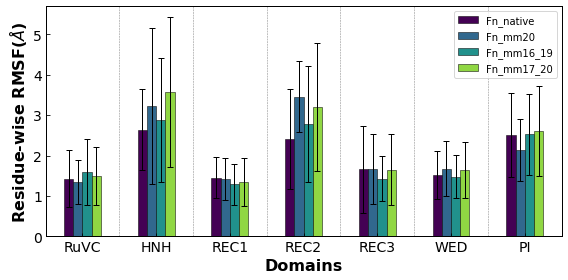

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create data
df_mean = pd.DataFrame([['RuVC', 1.43, 1.34, 1.59, 1.49], ['HNH', 2.64, 3.22, 2.88, 3.57], ['REC1', 1.45, 1.42, 1.29, 1.34],
['REC2', 2.410, 3.46, 2.78, 3.20], ['REC3', 1.66, 1.66, 1.43, 1.65], ['WED', 1.51, 1.67, 1.48, 1.65], ['PI',2.51, 2.14,2.52,2.60]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20']) 

df_std=pd.DataFrame([['RuVC', 0.700, 0.545, 0.816, 0.711], ['HNH', 0.998, 1.93, 1.53, 1.85], ['REC1',0.501, 0.510, 0.506, 0.599],
['REC2',1.23, 0.89 , 1.443, 1.586], ['REC3',1.08, 0.86, 0.568, 0.880], ['WED',  0.59,  0.68,0.54, 0.69], ['PI',1.03, 0.77,1.01,1.11]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20'])
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

color_dict=['#440154','#31688e','#21918c','#90d743']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(8,4),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('Residue-wise RMSF($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/FnCas9_all_domain-wise-RMSF_stable-part.svg')
plt.show()

In [14]:
import pandas as pd # 
data_rmsd_first=pd.DataFrame(list(zip(fn_rmsd_first,fnmm20_rmsd_first,fnmm16_19_rmsd_first,fnmm17_20_rmsd_first)), columns=['RMSD_fn_native','RMSD_fn_mm20','RMSD_fn_mm16-19','RMSD_fn_mm17-20'])
data_rmsg = pd.DataFrame(list(zip(fn_rmsg,fnmm20_rmsg,fnmm16_19_rmsg,fnmm17_20_rmsg)), columns=['ROG_fn_native','ROG_fn_mm20','ROG_fn_mm16-19','ROG_fn_mm17-20'])
data_sec=pd.DataFrame(list(zip(fn_sec,fnmm20_sec,fnmm16_19_sec,fnmm17_20_sec)), columns=['Sec_fn_native','Sec_fn_mm20','Sec_fn_mm16-19','Sec_fn_mm17-20'])
data_surf=pd.DataFrame(list(zip(fn_surf,fnmm20_surf,fnmm16_19_surf,fnmm17_20_surf)), columns=['SASA_fn_native','SASA_fn_mm20','SASA_fn_mm16-19','SASA_fn_mm17-20'])
data_prot = pd.DataFrame(list(zip(fn_prot,fnmm20_prot,fnmm16_19_prot,fnmm17_20_prot)), columns=['Hbonds_fn_native','Hbonds_fn_mm20','Hbonds_fn_mm16-19','Hbonds_fn_mm17-20'])
data_prot.head()

,Hbonds_fn_native,Hbonds_fn_mm20,Hbonds_fn_mm16-19,Hbonds_fn_mm17-20
0,"[730, 777, 720, 750, 732, 760, 749, 769, 712, ...","[750, 768, 762, 770, 755, 736, 742, 753, 750, ...","[772, 784, 777, 727, 755, 759, 761, 745, 769, ...","[733, 733, 754, 729, 754, 731, 789, 754, 745, ..."
1,"[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, ..."
2,"[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...","[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ..."
4,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."


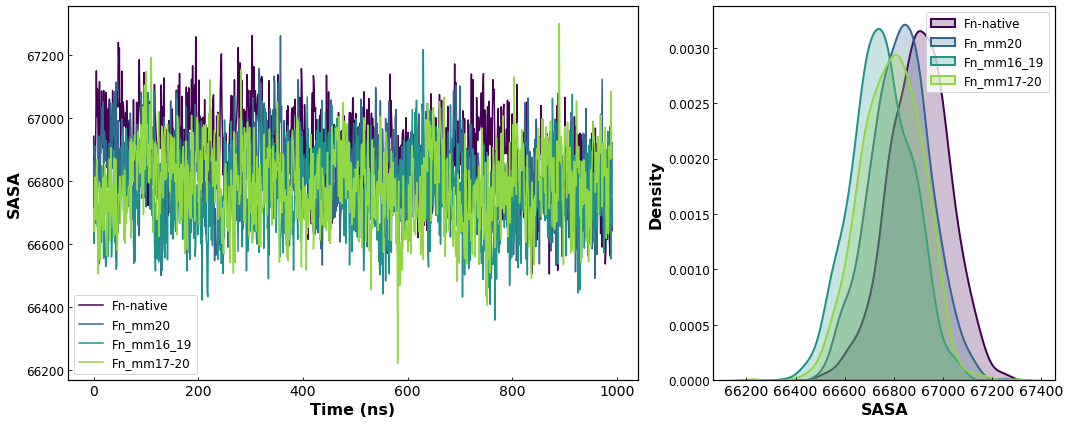

In [22]:
from matplotlib import pyplot as plt
color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_surf.plot(ax=ax1, color=color_dict)
plt.legend(['Fn-native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17-20'], fontsize=12)
plt.ylabel('SASA', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_surf['SASA_fn_native'], ax=ax2, color=color_dict[0], label='Fn-native', fill=True,linewidth=2)
sns.kdeplot(data=data_surf['SASA_fn_mm20'], ax=ax2, color=color_dict[1], label='Fn_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_fn_mm16-19'], ax=ax2, color=color_dict[2], label='Fn_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_fn_mm17-20'], ax=ax2, color=color_dict[3], label='Fn_mm17-20', fill=True, linewidth=2)
plt.xlabel('SASA', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/FnCas9_all_SASA_with_density-stable-part_subplot.svg')
plt.show()


In [13]:
data_surf.columns=['Fn_native','Fn_mm20','Fn_mm16_19','Fn_mm17-20']
data_surf_save=data_surf.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_surf_save.columns=['Label','SASA']
data_surf_save.to_csv('FnCas9_all-protein_SASA.csv', index=False)
data_surf_save.head()

,Label,SASA
0,Fn_native,66942.508303
1884,Fn_native,66957.382244
1876,Fn_native,66865.677648
1872,Fn_native,67017.870851
1868,Fn_native,66770.012327


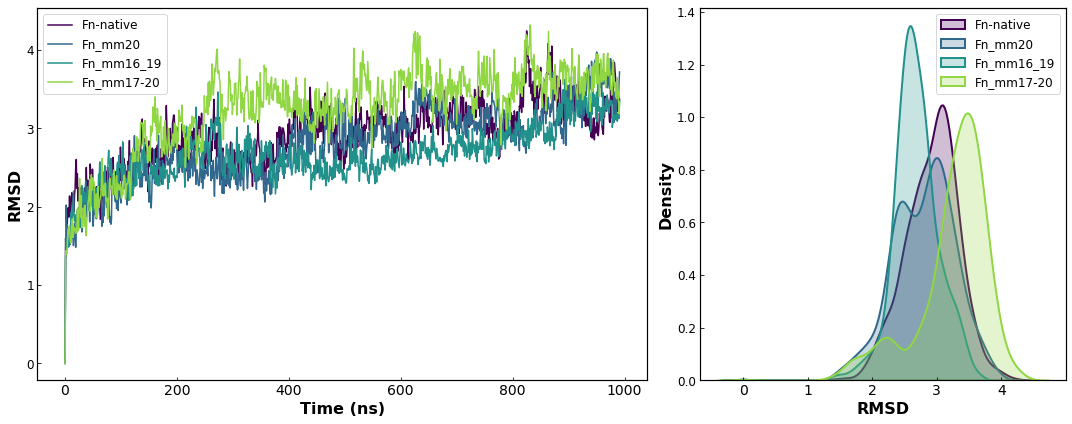

In [23]:
color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_first.plot(ax=ax1, color=color_dict)
plt.legend(['Fn-native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_first['RMSD_fn_native'], ax=ax2, color=color_dict[0], label='Fn-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_fn_mm20'], ax=ax2, color=color_dict[1], label='Fn_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_fn_mm16-19'], ax=ax2, color=color_dict[2], label='Fn_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_fn_mm17-20'], ax=ax2, color=color_dict[3], label='Fn_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/FnCas9_all_RMSD-prot_with_density-stable-part_subplot.svg')
plt.show()

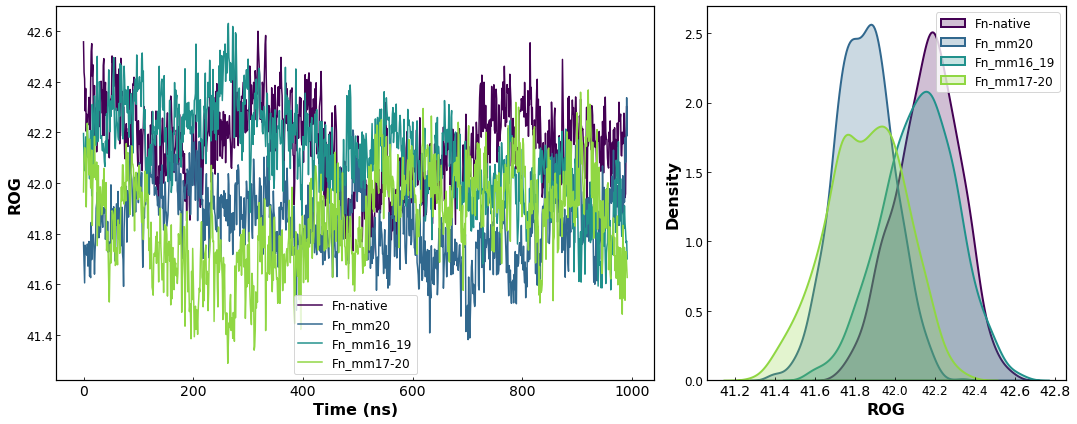

In [24]:
from matplotlib import pyplot as plt
color_dict=['#440154','#31688e','#21918c','#90d743']
#plt.legend(['FnCas9-native','FnCas9-mm20','FnCas9-mm16,19','FnCas9-mm17-20'],fontsize=12)
# plt.ylabel('ROG', fontsize=14)
# plt.xlabel('Frames',fontsize=14)
# #plt.title('Backbone after lsq fit to Backbone')
# plt.gcf().set_size_inches(8, 5)
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rg.plot(ax=ax1, color=color_dict)
plt.legend(['Fn-native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17-20'], fontsize=12)
plt.ylabel('ROG', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rg['ROG_fn_native'], ax=ax2, color=color_dict[0], label='Fn-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rg['ROG_fn_mm20'], ax=ax2, color=color_dict[1], label='Fn_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_fn_mm16-19'], ax=ax2, color=color_dict[2], label='Fn_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_fn_mm17-20'], ax=ax2, color=color_dict[3], label='Fn_mm17-20', fill=True, linewidth=2)
plt.xlabel('ROG', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/FnCas9_all_ROG_with_density-stable-part_subplot.svg')
plt.show()


In [19]:
data_rg.columns=['Fn_native','Fn_mm20','Fn_mm16_19','Fn_mm17-20']
data_rg_save=data_rg.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rg_save.columns=['Label','ROG']
data_rg_save.to_csv('FnCas9_all-protein_ROG.csv', index=False)
data_rg_save.head()

,Label,ROG
0,Fn_native,42.558150
1884,Fn_native,41.786148
1876,Fn_native,42.060966
1872,Fn_native,41.957582
1868,Fn_native,41.910865


In [20]:
fn_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Fn_native_rep/Fn_native_300-500ns.csv')
fnmm20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Fn_mm20/repeat/Fn_mm20_300-500ns.csv')
fnmm16_19_rmsf=pd.read_csv('/storage3/gayatrip/EMX1_Fn_mm16_19/Fn_mm16_19_300-500ns.csv')
fnmm17_20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Fn_mm17-20/Fn_mm17-20_300-500ns.csv')

data_rmsf=pd.DataFrame()
data_rmsf['fn_RMSF']=fn_rmsf
data_rmsf['fnmm20_RMSF']=fnmm20_rmsf
data_rmsf['fnmm16-19_RMSF']=fnmm16_19_rmsf
data_rmsf['fnmm17-20_RMSF']=fnmm17_20_rmsf
data_rmsf.head()

,fn_RMSF,fnmm20_RMSF,fnmm16-19_RMSF,fnmm17-20_RMSF
0,3.5286,2.9968,3.2904,3.1736
1,2.1718,1.7306,1.8280,1.6586
2,1.4137,1.1631,1.3121,1.2098
3,1.1584,0.9578,1.1106,1.0146
4,1.0312,0.8553,1.0038,0.9311


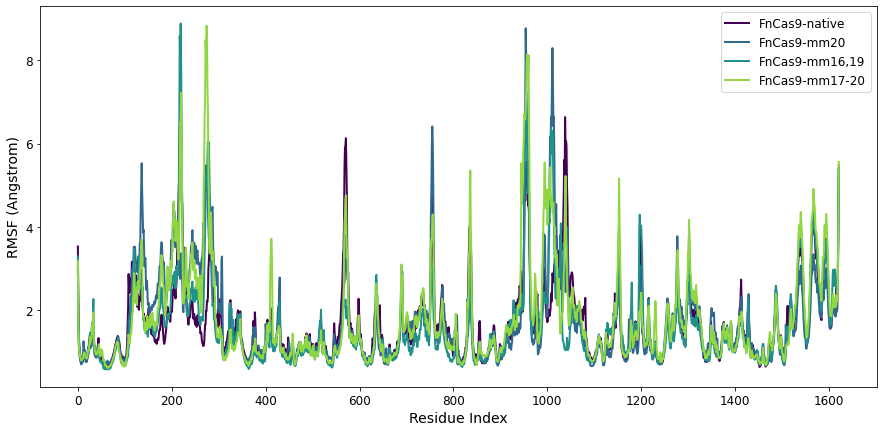

In [17]:
data_rmsf.plot(color=color_dict, linewidth=2)
plt.legend(['FnCas9-native','FnCas9-mm20','FnCas9-mm16,19','FnCas9-mm17-20'],fontsize=12)
plt.ylabel('RMSF (Angstrom)', fontsize=14)
plt.xlabel('Residue Index',fontsize=14)
plt.gcf().set_size_inches(15, 7)

#D911-b18 Mm-D1027 – 1506

R904-b17 Mm-R1020 -1505

S908-b18 Mm-S1024-1506

In [4]:
# # compute pca for RNA-DNA hybrid
fn_pca=pt.pca(traj1, mask=':1623-1642,1726-1745', n_vecs=2)
fnmm20_pca=pt.pca(traj2, mask=':1623-1642,1726-1745', n_vecs=2)
fnmm16_19_pca=pt.pca(traj3, mask=':1623-1642,1726-1745', n_vecs=2)
fnmm17_20_pca=pt.pca(traj4, mask=':1623-1642,1726-1745', n_vecs=2)

In [5]:
# # compute pca for HNH HNH=937-1070
fn_pca_hnh=pt.pca(traj1, mask=':937-1070', n_vecs=2)
fnmm20_pca_hnh=pt.pca(traj2, mask=':937-1070', n_vecs=2)
fnmm16_19_pca_hnh=pt.pca(traj3, mask=':937-1070', n_vecs=2)
fnmm17_20_pca_hnh=pt.pca(traj4, mask=':937-1070', n_vecs=2)

In [6]:
# # compute pca for ruvc
fn_pca_ruvc=pt.pca(traj1, mask=':1-51,858-899,1088-1224', n_vecs=2)
fnmm20_pca_ruvc=pt.pca(traj2, mask=':1-51,858-899,1088-1224', n_vecs=2)
fnmm16_19_pca_ruvc=pt.pca(traj3, mask=':1-51,858-899,1088-1224', n_vecs=2)
fnmm17_20_pca_ruvc=pt.pca(traj4, mask=':1-51,858-899,1088-1224', n_vecs=2)

In [7]:
# # compute pca for rec3 
fn_pca_rec1=pt.pca(traj1, mask=':83-112,307-459', n_vecs=2)
fnmm20_pca_rec1=pt.pca(traj2, mask=':83-112,307-459', n_vecs=2)
fnmm16_19_pca_rec1=pt.pca(traj3, mask=':83-112,307-459', n_vecs=2)
fnmm17_20_pca_rec1=pt.pca(traj4, mask=':83-112,307-459', n_vecs=2)

In [8]:
# # compute pca for rec2
fn_pca_rec2=pt.pca(traj1, mask=':112-307', n_vecs=2)
fnmm20_pca_rec2=pt.pca(traj2, mask=':112-307', n_vecs=2)
fnmm16_19_pca_rec2=pt.pca(traj3, mask=':112-307', n_vecs=2)
fnmm17_20_pca_rec2=pt.pca(traj4, mask=':112-307', n_vecs=2)

In [9]:
# # compute pca for rec3 
fn_pca_rec3=pt.pca(traj1, mask=':459-858', n_vecs=2)
fnmm20_pca_rec3=pt.pca(traj2, mask=':459-858', n_vecs=2)
fnmm16_19_pca_rec3=pt.pca(traj3, mask=':459-858', n_vecs=2)
fnmm17_20_pca_rec3=pt.pca(traj4, mask=':459-858', n_vecs=2)

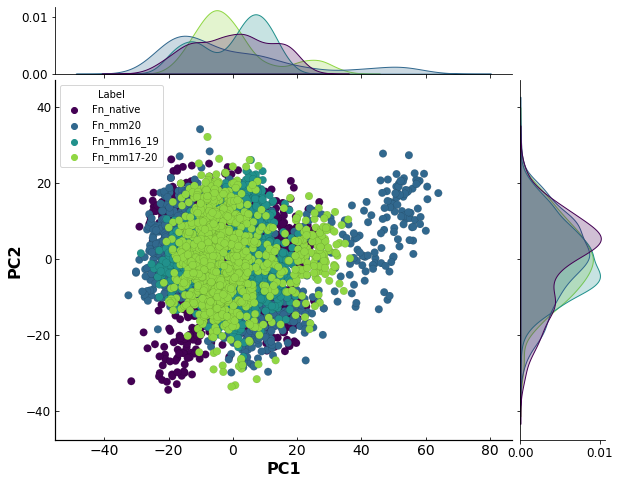

In [23]:
df1 = pd.DataFrame({'PC1': fn_pca[0][0], 'PC2': fn_pca[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca[0][0], 'PC2': fnmm20_pca[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca[0][0], 'PC2': fnmm16_19_pca[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca[0][0], 'PC2': fnmm17_20_pca[0][1]})
color_dict=['#440154','#31688e','#21918c','#90d743']

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.1, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/FnCas9_all_hybrid_pca-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=fn_pca[0][0], x="total_bill", y="tip", kind="reg", marker="*")

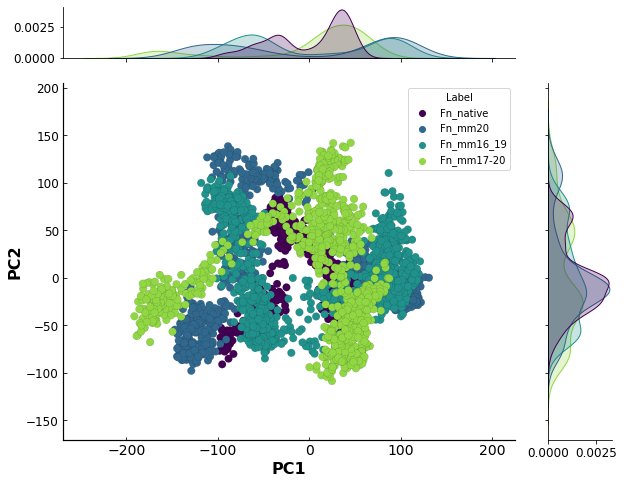

In [25]:
df1 = pd.DataFrame({'PC1': fn_pca_hnh[0][0], 'PC2': fn_pca_hnh[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca_hnh[0][0], 'PC2': fnmm20_pca_hnh[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca_hnh[0][0], 'PC2': fnmm16_19_pca_hnh[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca_hnh[0][0], 'PC2': fnmm17_20_pca_hnh[0][1]})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/FnCas9_all_hybrid_pca_hnh-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=fn_pca_hnh[0][0], x="total_bill", y="tip", kind="reg", marker="*")

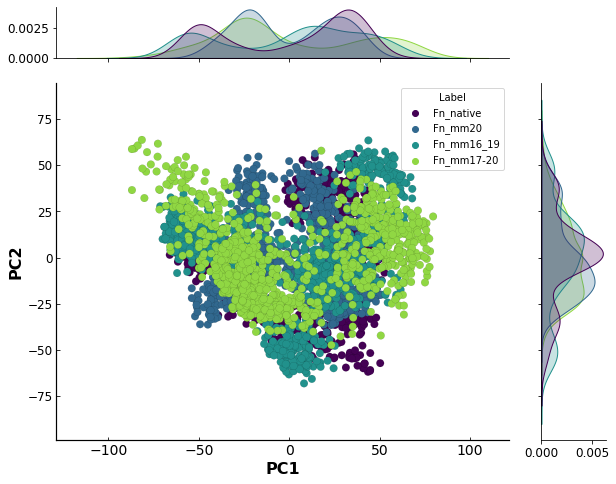

In [27]:
df1 = pd.DataFrame({'PC1': fn_pca_ruvc[0][0], 'PC2': fn_pca_ruvc[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca_ruvc[0][0], 'PC2': fnmm20_pca_ruvc[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca_ruvc[0][0], 'PC2': fnmm16_19_pca_ruvc[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca_ruvc[0][0], 'PC2': fnmm17_20_pca_ruvc[0][1]})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=fn_pca_ruvc[0][0], x="total_bill", y="tip", kind="reg", marker="*")

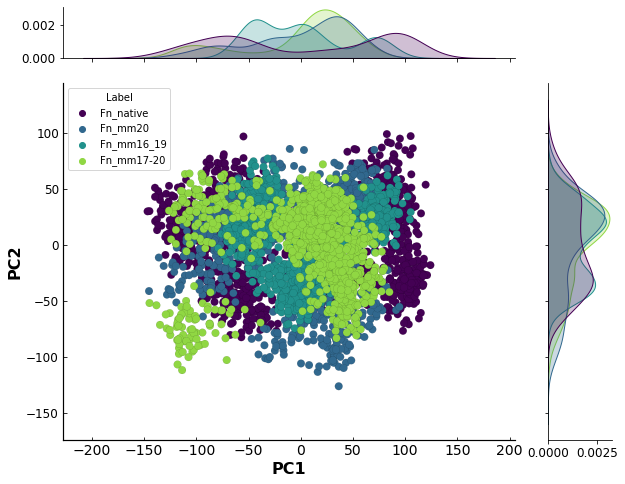

In [29]:
df1 = pd.DataFrame({'PC1': fn_pca_rec3[0][0], 'PC2': fn_pca_rec3[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca_rec3[0][0], 'PC2': fnmm20_pca_rec3[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca_rec3[0][0], 'PC2': fnmm16_19_pca_rec3[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca_rec3[0][0], 'PC2': fnmm17_20_pca_rec3[0][1]})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/FnCas9_all_hybrid_pca_rec3-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=fn_pca_rec3[0][0], x="total_bill", y="tip", kind="reg", marker="*")

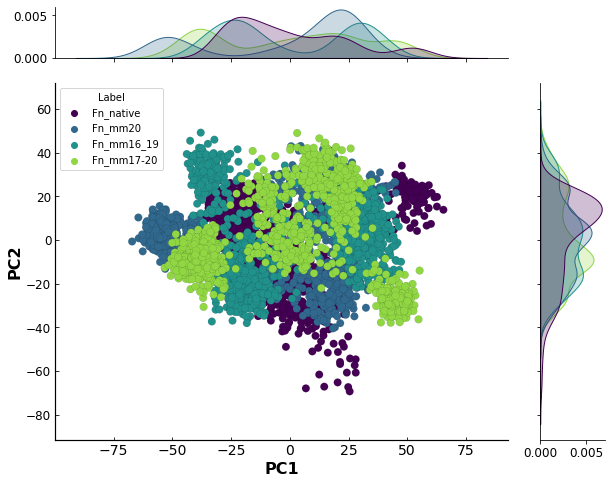

In [31]:
df1 = pd.DataFrame({'PC1': fn_pca_rec1[0][0], 'PC2': fn_pca_rec1[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca_rec1[0][0], 'PC2': fnmm20_pca_rec1[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca_rec1[0][0], 'PC2': fnmm16_19_pca_rec1[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca_rec1[0][0], 'PC2': fnmm17_20_pca_rec1[0][1]})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/FnCas9_all_hybrid_pca_rec1-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=fn_pca_rec1[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [32]:
pca_dup.to_csv('Fn_NA_csvs/Fn_PCA_PCs_REC1.csv', index=False)

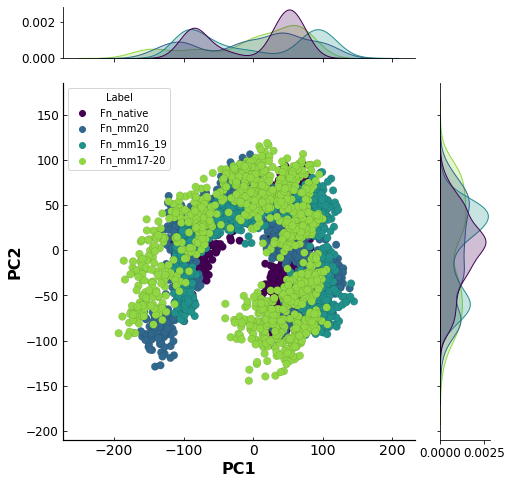

In [33]:
df1 = pd.DataFrame({'PC1': fn_pca_rec2[0][0], 'PC2': fn_pca_rec2[0][1]})
df2 = pd.DataFrame({'PC1': fnmm20_pca_rec2[0][0], 'PC2': fnmm20_pca_rec2[0][1]})
df3 = pd.DataFrame({'PC1': fnmm16_19_pca_rec2[0][0], 'PC2': fnmm16_19_pca_rec2[0][1]})
df4 = pd.DataFrame({'PC1': fnmm17_20_pca_rec2[0][0], 'PC2': fnmm17_20_pca_rec2[0][1]})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/FnCas9_all_hybrid_pca_rec2-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=fn_pca_rec2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [58]:
nat_nuc_pc1=fn_pca_ruvc[0][0]+ fn_pca_hnh[0][0] 
mm20_nuc_pc1=fnmm20_pca_ruvc[0][0]+ fnmm20_pca_hnh[0][0]
mm16_19_nuc_pc1=fnmm16_19_pca_ruvc[0][0]+ fnmm16_19_pca_hnh[0][0]
mm17_20_nuc_pc1=fnmm17_20_pca_ruvc[0][0]+ fnmm17_20_pca_hnh[0][0]

In [60]:
nat_nuc_pc2=fn_pca_ruvc[0][1]+ fn_pca_hnh[0][1] 
mm20_nuc_pc2=fnmm20_pca_ruvc[0][1]+ fnmm20_pca_hnh[0][1]
mm16_19_nuc_pc2=fnmm16_19_pca_ruvc[0][1]+ fnmm16_19_pca_hnh[0][1]
mm17_20_nuc_pc2=fnmm17_20_pca_ruvc[0][1]+ fnmm17_20_pca_hnh[0][1]

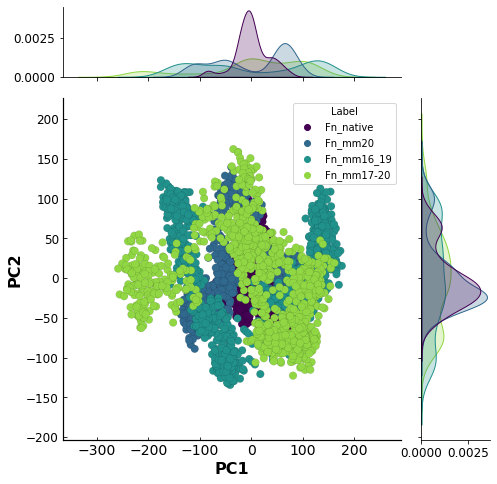

In [66]:
df1 = pd.DataFrame({'PC1': nat_nuc_pc1, 'PC2': nat_nuc_pc2})
df2 = pd.DataFrame({'PC1': mm20_nuc_pc1, 'PC2': mm20_nuc_pc2})
df3 = pd.DataFrame({'PC1': mm16_19_nuc_pc1, 'PC2': mm16_19_nuc_pc2})
df4 = pd.DataFrame({'PC1': mm17_20_nuc_pc1, 'PC2': mm17_20_nuc_pc2})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.3, ratio=4, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/FnCas9_all_hybrid_pca_nuc-lobe-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=fn_pca_nuc2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [51]:
nat_rec_pc1=fn_pca_rec1[0][0]+ fn_pca_rec2[0][0] + fn_pca_rec3[0][0]
mm20_rec_pc1=fnmm20_pca_rec1[0][0]+ fnmm20_pca_rec2[0][0] + fnmm20_pca_rec3[0][0]
mm16_19_rec_pc1=fnmm16_19_pca_rec1[0][0]+ fnmm16_19_pca_rec2[0][0] + fnmm16_19_pca_rec3[0][0]
mm17_20_rec_pc1=fnmm17_20_pca_rec1[0][0]+ fnmm17_20_pca_rec2[0][0] + fnmm17_20_pca_rec3[0][0]

In [52]:
nat_rec_pc2=fn_pca_rec1[0][1]+ fn_pca_rec2[0][1] + fn_pca_rec3[0][1]
mm20_rec_pc2=fnmm20_pca_rec1[0][1]+ fnmm20_pca_rec2[0][1] + fnmm20_pca_rec3[0][1]
mm16_19_rec_pc2=fnmm16_19_pca_rec1[0][1]+ fnmm16_19_pca_rec2[0][1] + fnmm16_19_pca_rec3[0][1]
mm17_20_rec_pc2=fnmm17_20_pca_rec1[0][1]+ fnmm17_20_pca_rec2[0][1] + fnmm17_20_pca_rec3[0][1]

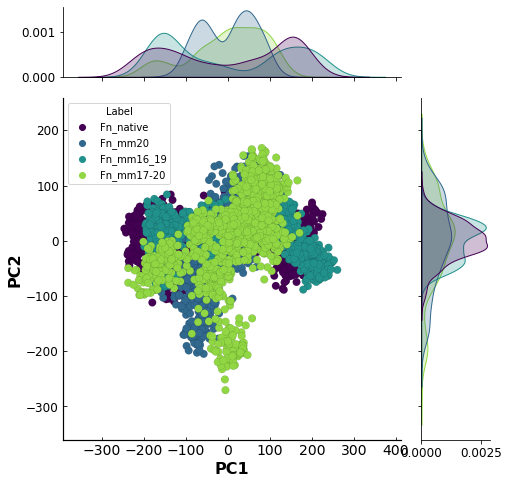

In [57]:
df1 = pd.DataFrame({'PC1': nat_rec_pc1, 'PC2': nat_rec_pc2})
df2 = pd.DataFrame({'PC1': mm20_rec_pc1, 'PC2': mm20_rec_pc2})
df3 = pd.DataFrame({'PC1': mm16_19_rec_pc1, 'PC2': mm16_19_rec_pc2})
df4 = pd.DataFrame({'PC1': mm17_20_rec_pc1, 'PC2': mm17_20_rec_pc2})

df1['Label']=['Fn_native']*len(df1)
df2['Label']=['Fn_mm20']*len(df2)
df3['Label']=['Fn_mm16_19']*len(df3)
df4['Label']=['Fn_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.3, ratio=4, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/FnCas9_all_hybrid_pca_rec-lobe-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=fn_pca_rec2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [40]:
print(traj3, traj2)

pytraj.Trajectory, 490 frames: 
Size: 0.303413 (GB)
<Topology: 27703 atoms, 1528 residues, 6 mols, PBC with box type = octahedral>
            pytraj.Trajectory, 500 frames: 
Size: 0.309605 (GB)
<Topology: 27703 atoms, 1528 residues, 6 mols, PBC with box type = octahedral>
           


In [11]:
#native contacts between RuvC and ntDNA
fn_ruv_nt = pt.native_contacts(traj1, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=fn_traj[1000])
fnmm20_ruv_nt = pt.native_contacts(traj2, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_ruv_nt = pt.native_contacts(traj3, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_ruv_nt = pt.native_contacts(traj4, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=fnmm17_20_traj[1000])
type(fnmm20_ruv_nt[0])
# nat_ruv_nt = pd.DataFrame()
# natr=list(nat_ruv_nt[0])

pytraj.datasets.array.DataArray

In [12]:
#native contacts between HNH and tDNA
fn_hnh_t = pt.native_contacts(traj1, mask=':1717-1764', mask2=':937-1070',  distance=4.0, ref=fn_traj[1000])
fnmm20_hnh_t = pt.native_contacts(traj2, mask=':1717-1764', mask2=':937-1070',  distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_hnh_t = pt.native_contacts(traj3, mask=':1717-1764', mask2=':937-1070', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_hnh_t = pt.native_contacts(traj4, mask=':1717-1764', mask2=':937-1070', distance=4.0, ref=fnmm17_20_traj[1000])
#nath=list(nat_hnh_t[0])

In [14]:
#native contacts between tDNA and ntDNA
fn_nt_t = pt.native_contacts(traj1, mask=':1716-1725', mask2=':1756-1764', distance=4.0, ref=fn_traj[1000])
fnmm20_nt_t = pt.native_contacts(traj2, mask=':1716-1725', mask2=':1756-1764', distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_nt_t = pt.native_contacts(traj3, mask=':1716-1725 ', mask2=':1756-1764', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_nt_t = pt.native_contacts(traj4, mask=':1716-1725 ', mask2=':1756-1764',distance=4.0, ref=fnmm17_20_traj[1000])
#natt=list(nat_nt_t[0])

In [15]:
#native contacts between sgRNA and tDNA
fn_rna_tdna = pt.native_contacts(traj1, mask=':1624-1642', mask2=':1727-1745', distance=4.0, ref=fn_traj[1000])
fnmm20_rna_tdna = pt.native_contacts(traj2, mask=':1624-1642 ', mask2=':1727-1745',  distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_rna_tdna = pt.native_contacts(traj3, mask=':1624-1642 ', mask2=':1727-1745',  distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_rna_tdna = pt.native_contacts(traj4, mask=':1624-1642 ', mask2=':1727-1745', distance=4.0, ref=fnmm17_20_traj[1000])
#natrd=list(nat_rna_tdna[0])

In [16]:
# #native contacts between RNA-DNA and L2 loop
# sp_l2_t=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# spmm20_l2_t=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# spmm17_20_l2_t=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# #natl2=list(nat_l2_t[0])

In [17]:
#native contacts between RNA-DNA and REC3
fn_rec3=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=fn_traj[1000])
fnmm20_rec3=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':459-858',  distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_rec3=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_rec3=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=fnmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [18]:
#native contacts between RNA-DNA and REC2
fn_rec2=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':112-307', distance=4.0, ref=fn_traj[1000])
fnmm20_rec2=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':112-307',  distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_rec2=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':112-307', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_rec2=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':112-307',  distance=4.0, ref=fnmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [19]:
#native contacts between RNA-DNA and rec3
fn_rec3=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':83-112,307-459', distance=4.0, ref=fn_traj[1000])
fnmm20_rec3=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':83-112,307-459',  distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_rec3=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':83-112,307-459', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_rec3=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':83-112,307-459', distance=4.0, ref=fnmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [21]:
#native contacts between RNA-DNA and RuvC
fn_ruvc=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=fn_traj[1000])
fnmm20_ruvc=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_ruvc=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_ruvc=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=fnmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [22]:
#native contacts between RNA-DNA and HNH
fn_hnh=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=fn_traj[1000])
fnmm20_hnh=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':937-1070',distance=4.0, ref=fnmm20_traj[1000])
fnmm16_19_hnh=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=fnmm16_19_traj[1000])
fnmm17_20_hnh=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=fnmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [23]:
import pandas as pd
nat_sp=pd.DataFrame(list(zip(list(fn_ruv_nt[0]),list(fn_hnh_t[0]),list(fn_nt_t[0]),list(fn_rna_tdna[0]),list(fn_rec3[0]),list(fn_ruvc[0]),list(fn_hnh[0]))), columns=['fn_RuvC-ntDNA','fn_HNH-tDNA','fn_ntDNA-tDNA','fn_sgRNA-tDNA','fn_REC3-RNA_DNA','fn_RuvC-RNA_DNA','fn_HNH-RNA_DNA'])

In [24]:
#awk '{print $2}' dist_rec3loop_tdna.agr > dist_rec3loop_tdna.csv
import pandas as pd
nat_fn=pd.DataFrame(list(zip(list(fn_ruv_nt[0]),list(fn_hnh_t[0]),list(fn_nt_t[0]),list(fn_rna_tdna[0]),list(fn_rec3[0]),list(fn_rec2[0]),list(fn_rec3[0]),list(fn_ruvc[0]),list(fn_hnh[0]))), columns=['fn_RuvC-ntDNA','fn_HNH-tDNA','fn_ntDNA-tDNA','fn_sgRNA-tDNA','fn_REC3-RNA_DNA','fn_REC2-RNA_DNA','fn_rec3-RNA_DNA','fn_RuvC-RNA_DNA','fn_HNH-RNA_DNA'])
nat_fnmm20=pd.DataFrame(list(zip(list(fnmm20_ruv_nt[0]),list(fnmm20_hnh_t[0]),list(fnmm20_nt_t[0]),list(fnmm20_rna_tdna[0]),list(fnmm20_rec3[0]),list(fnmm20_rec2[0]),list(fnmm20_rec3[0]),list(fnmm20_ruvc[0]),list(fnmm20_hnh[0]))), columns=['fnmm20_RuvC-ntDNA','fnmm20_HNH-tDNA','fnmm20_ntDNA-tDNA','fnmm20_sgRNA-tDNA','fnmm20_REC3-RNA_DNA','fnmm20_REC2-RNA_DNA','fnmm20_rec3-RNA_DNA','fnmm20_RuvC-RNA_DNA','fnmm20_HNH-RNA_DNA'])
nat_fnmm16_19=pd.DataFrame(list(zip(list(fnmm16_19_ruv_nt[0]),list(fnmm16_19_hnh_t[0]),list(fnmm16_19_nt_t[0]),list(fnmm16_19_rna_tdna[0]),list(fnmm16_19_rec3[0]),list(fnmm16_19_rec2[0]),list(fnmm16_19_rec3[0]),list(fnmm16_19_ruvc[0]),list(fnmm16_19_hnh[0]))), columns=['fnmm16_19_RuvC-ntDNA','fnmm16_19_HNH-tDNA','fnmm16_19_ntDNA-tDNA','fnmm16_19_sgRNA-tDNA','fnmm16_19_REC3-RNA_DNA','fnmm16_19_REC2-RNA_DNA','fnmm16_19_rec3-RNA_DNA','fnmm16_19_RuvC-RNA_DNA','fnmm16_19_HNH-RNA_DNA'])
nat_fnmm17_20=pd.DataFrame(list(zip(list(fnmm17_20_ruv_nt[0]),list(fnmm17_20_hnh_t[0]),list(fnmm17_20_nt_t[0]),list(fnmm17_20_rna_tdna[0]),list(fnmm17_20_rec3[0]),list(fnmm17_20_rec2[0]),list(fnmm17_20_rec3[0]),list(fnmm17_20_ruvc[0]),list(fnmm17_20_hnh[0]))),columns=['fnmm17-20_RuvC-ntDNA','fnmm17-20_HNH-tDNA','fnmm17-20_ntDNA-tDNA','fnmm17-20_sgRNA-tDNA','fnmm17-20_REC3-RNA_DNA','fnmm17-20_REC2-RNA_DNA','fnmm17-20_rec3-RNA_DNA','fnmm17-20_RuvC-RNA_DNA','fnmm17-20_HNH-RNA_DNA'])                    

In [25]:
nat_fn.to_csv('native_contacts_fn_nat_ref10ns.csv', index=False)
nat_fnmm20.to_csv('native_contacts_fn_mm20_ref10ns.csv', index=False)
nat_fnmm16_19.to_csv('native_contacts_fn_mm16-19_ref10ns.csv', index=False)
nat_fnmm17_20.to_csv('native_contacts_fn_mm17-20_ref10ns.csv', index=False)

In [2]:
import pandas as pd

nat_fn=pd.read_csv('native_contacts_fn_nat_ref10ns.csv')
nat_fnmm20=pd.read_csv('native_contacts_fn_mm20_ref10ns.csv')
nat_fnmm16_19=pd.read_csv('native_contacts_fn_mm16-19_ref10ns.csv')
nat_fnmm17_20=pd.read_csv('native_contacts_fn_mm17-20_ref10ns.csv')

In [3]:
nat_fnmm20.head()

,fnmm20_RuvC-ntDNA,fnmm20_HNH-tDNA,fnmm20_ntDNA-tDNA,fnmm20_sgRNA-tDNA,fnmm20_REC3-RNA_DNA,fnmm20_REC2-RNA_DNA,fnmm20_REC1-RNA_DNA,fnmm20_RuvC-RNA_DNA,fnmm20_HNH-RNA_DNA
0,19,40,331,556,311,6,232,0,35
1,6,44,313,589,363,23,202,0,38
2,18,29,297,622,322,20,215,0,26
3,8,27,339,603,356,16,200,0,18
4,9,40,328,582,331,24,181,0,37


In [4]:
#print(nat_sp.columns, nat_spmm20.columns)
native=pd.concat([nat_fn,nat_fnmm20,nat_fnmm16_19,nat_fnmm17_20], axis=1)
native.columns

Index(['fn_RuvC-ntDNA', 'fn_HNH-tDNA', 'fn_ntDNA-tDNA', 'fn_sgRNA-tDNA',
       'fn_REC3-RNA_DNA', 'fn_REC2-RNA_DNA', 'fn_REC1-RNA_DNA',
       'fn_RuvC-RNA_DNA', 'fn_HNH-RNA_DNA', 'fnmm20_RuvC-ntDNA',
       'fnmm20_HNH-tDNA', 'fnmm20_ntDNA-tDNA', 'fnmm20_sgRNA-tDNA',
       'fnmm20_REC3-RNA_DNA', 'fnmm20_REC2-RNA_DNA', 'fnmm20_REC1-RNA_DNA',
       'fnmm20_RuvC-RNA_DNA', 'fnmm20_HNH-RNA_DNA', 'fnmm16_19_RuvC-ntDNA',
       'fnmm16_19_HNH-tDNA', 'fnmm16_19_ntDNA-tDNA', 'fnmm16_19_sgRNA-tDNA',
       'fnmm16_19_REC3-RNA_DNA', 'fnmm16_19_REC2-RNA_DNA',
       'fnmm16_19_REC1-RNA_DNA', 'fnmm16_19_RuvC-RNA_DNA',
       'fnmm16_19_HNH-RNA_DNA', 'fnmm17-20_RuvC-ntDNA', 'fnmm17-20_HNH-tDNA',
       'fnmm17-20_ntDNA-tDNA', 'fnmm17-20_sgRNA-tDNA',
       'fnmm17-20_REC3-RNA_DNA', 'fnmm17-20_REC2-RNA_DNA',
       'fnmm17-20_REC1-RNA_DNA', 'fnmm17-20_RuvC-RNA_DNA',
       'fnmm17-20_HNH-RNA_DNA'],
      dtype='object')

<AxesSubplot:>

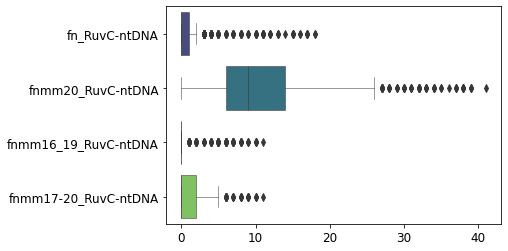

In [30]:
sns.boxplot(data=native[['fn_RuvC-ntDNA','fnmm20_RuvC-ntDNA','fnmm16_19_RuvC-ntDNA','fnmm17-20_RuvC-ntDNA']],palette="viridis",linewidth=0.5,orient="h")

<AxesSubplot:>

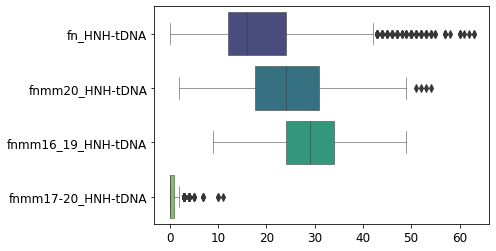

In [32]:
sns.boxplot(data=native[['fn_HNH-tDNA','fnmm20_HNH-tDNA','fnmm16_19_HNH-tDNA','fnmm17-20_HNH-tDNA']],palette="viridis",linewidth=0.5,orient="h")

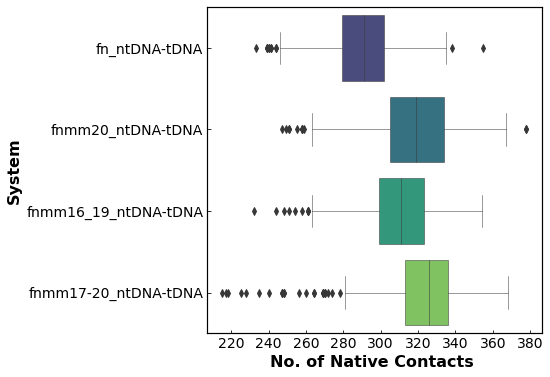

In [6]:
ax=sns.boxplot(data=native[['fn_ntDNA-tDNA','fnmm20_ntDNA-tDNA','fnmm16_19_ntDNA-tDNA','fnmm17-20_ntDNA-tDNA']],palette="viridis",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Fn_all_stable-part_ntdna-tdna-conts-boxplot.svg')
plt.show()

<AxesSubplot:>

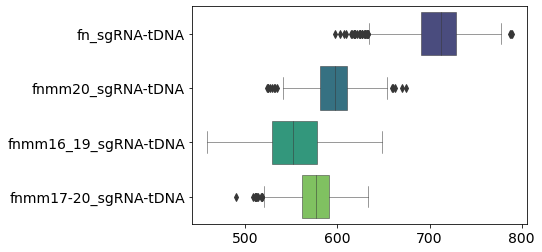

In [36]:
sns.boxplot(data=native[['fn_sgRNA-tDNA','fnmm20_sgRNA-tDNA','fnmm16_19_sgRNA-tDNA','fnmm17-20_sgRNA-tDNA']],palette="viridis",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Fn_all_stable-part_sgrna-tdna-conts-boxplot.svg')
plt.show()

In [38]:
Fn_sgrna_tdna=native[['fn_sgRNA-tDNA','fnmm20_sgRNA-tDNA','fnmm16_19_sgRNA-tDNA','fnmm17-20_sgRNA-tDNA']]
Fn_sgrna_tdna.columns=['Fn_native','Fn_mm20','Fn_mm16_19','Fn_mm17-20']
Fn_sgrna_tdna_save=Fn_sgrna_tdna.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
Fn_sgrna_tdna_save.columns=['Label','sgRNA-tDNA cont']
Fn_sgrna_tdna_save.to_csv('FnCas9_all-sgRNA-tDNA_conts.csv', index=False)
Fn_sgrna_tdna_save.head()

,Label,sgRNA-tDNA cont
0,Fn_native,748.0
1852,Fn_native,653.0
1892,Fn_native,633.0
1888,Fn_native,629.0
1884,Fn_native,662.0


<AxesSubplot:>

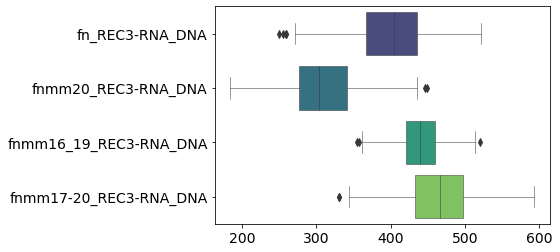

In [40]:
sns.boxplot(data=native[['fn_REC3-RNA_DNA','fnmm20_REC3-RNA_DNA','fnmm16_19_REC3-RNA_DNA','fnmm17-20_REC3-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

<AxesSubplot:>

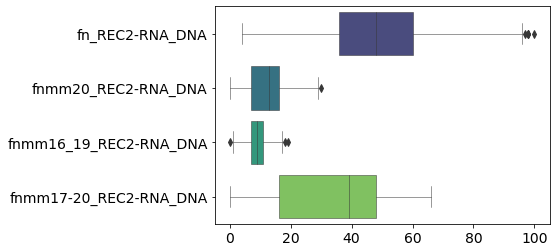

In [41]:
sns.boxplot(data=native[['fn_REC2-RNA_DNA','fnmm20_REC2-RNA_DNA','fnmm16_19_REC2-RNA_DNA','fnmm17-20_REC2-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

<AxesSubplot:>

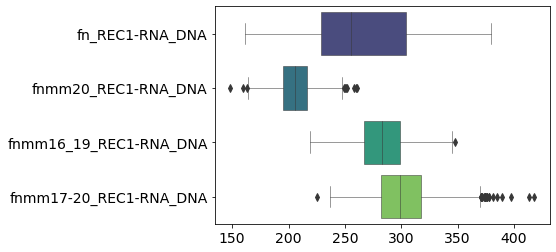

In [42]:
sns.boxplot(data=native[['fn_rec3-RNA_DNA','fnmm20_rec3-RNA_DNA','fnmm16_19_rec3-RNA_DNA','fnmm17-20_rec3-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

<AxesSubplot:>

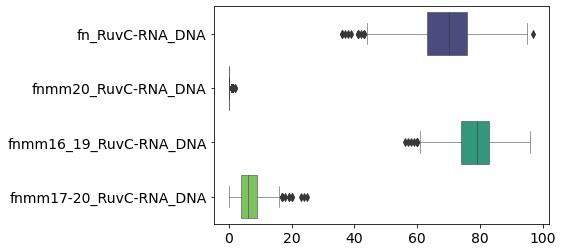

In [45]:
sns.boxplot(data=native[['fn_RuvC-RNA_DNA','fnmm20_RuvC-RNA_DNA','fnmm16_19_RuvC-RNA_DNA','fnmm17-20_RuvC-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

<AxesSubplot:>

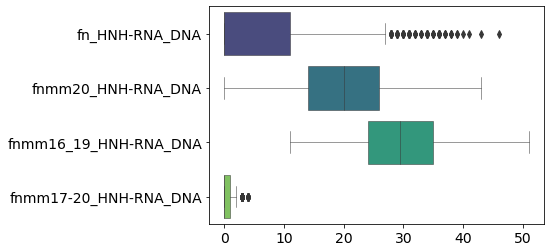

In [47]:
sns.boxplot(data=native[['fn_HNH-RNA_DNA','fnmm20_HNH-RNA_DNA','fnmm16_19_HNH-RNA_DNA','fnmm17-20_HNH-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [73]:
fn_hy_rec3=[]
fnmm20_hy_rec3=[]
fnmm16_19_hy_rec3=[]
fnmm17_20_hy_rec3=[]

for i in range(len(fn_hybrid)-1):
    fn_ruvh = math.dist(fn_hybrid[i],fn_rec3[i])
    fnmm20_ruvh = math.dist(fnmm20_hybrid[i],fnmm20_rec3[i])
    fnmm16_19_ruvh = math.dist(fnmm16_19_hybrid[i],fnmm16_19_rec3[i])
    fnmm17_20_ruvh = math.dist(fnmm17_20_hybrid[i],fnmm17_20_rec3[i])
    fn_hy_rec3.append(fn_ruvh)
    fnmm20_hy_rec3.append(fnmm20_ruvh)
    fnmm16_19_hy_rec3.append(fnmm16_19_ruvh)
    fnmm17_20_hy_rec3.append(fnmm17_20_ruvh)

fn_hy_rec3=pd.DataFrame(list(zip(fn_hy_rec3,fnmm20_hy_rec3,fnmm16_19_hy_rec3,fnmm17_20_hy_rec3)), columns=['fn_hybrid_rec3','fnmm20_hybrid_rec3','fnmm16_19_hybrid_rec3','fnmm17_20_hybrid_rec3'])
fn_hy_rec3.head()

,fn_hybrid_rec3,fnmm20_hybrid_rec3,fnmm16_19_hybrid_rec3,fnmm17_20_hybrid_rec3
0,23.796493,24.067335,24.893713,24.141212
1,24.152271,24.091029,24.979281,24.030636
2,24.267165,24.115176,24.412188,24.071532
3,23.968715,23.821357,24.907608,24.243154
4,24.483310,23.903588,24.823369,23.924021


In [74]:
fn_hy_hnh=[]
fnmm20_hy_hnh=[]
fnmm16_19_hy_hnh=[]
fnmm17_20_hy_hnh=[]

for i in range(len(fn_hybrid)-1):
    fn_ruvh = math.dist(fn_hybrid[i],fn_hnh[i])
    fnmm20_ruvh = math.dist(fnmm20_hybrid[i],fnmm20_hnh[i])
    fnmm16_19_ruvh = math.dist(fnmm16_19_hybrid[i],fnmm16_19_hnh[i])
    fnmm17_20_ruvh = math.dist(fnmm17_20_hybrid[i],fnmm17_20_hnh[i])
    fn_hy_hnh.append(fn_ruvh)
    fnmm20_hy_hnh.append(fnmm20_ruvh)
    fnmm16_19_hy_hnh.append(fnmm16_19_ruvh)
    fnmm17_20_hy_hnh.append(fnmm17_20_ruvh)

fn_hy_hnh=pd.DataFrame(list(zip(fn_hy_hnh,fnmm20_hy_hnh,fnmm16_19_hy_hnh,fnmm17_20_hy_hnh)), columns=['fn_hybrid_hnh','fnmm20_hybrid_hnh','fnmm16_19_hybrid_hnh','fnmm17_20_hybrid_hnh'])
fn_hy_hnh.head()

,fn_hybrid_hnh,fnmm20_hybrid_hnh,fnmm16_19_hybrid_hnh,fnmm17_20_hybrid_hnh
0,44.195738,40.466582,41.331637,44.471592
1,44.330518,40.613991,41.304692,44.209077
2,44.530264,41.124349,42.085191,44.422636
3,44.130061,40.761052,41.862660,44.520265
4,44.283027,40.643780,41.364632,45.056373


In [75]:
fn_td_hnh=[]
fnmm20_td_hnh=[]
fnmm16_19_td_hnh=[]
fnmm17_20_td_hnh=[]

for i in range(len(fn_tdna)-1):
    fn_ruvh = math.dist(fn_tdna[i],fn_hnh[i])
    fnmm20_ruvh = math.dist(fnmm20_tdna[i],fnmm20_hnh[i])
    fnmm16_19_ruvh = math.dist(fnmm16_19_tdna[i],fnmm16_19_hnh[i])
    fnmm17_20_ruvh = math.dist(fnmm17_20_tdna[i],fnmm17_20_hnh[i])
    fn_td_hnh.append(fn_ruvh)
    fnmm20_td_hnh.append(fnmm20_ruvh)
    fnmm16_19_td_hnh.append(fnmm16_19_ruvh)
    fnmm17_20_td_hnh.append(fnmm17_20_ruvh)

fn_td_hnh=pd.DataFrame(list(zip(fn_td_hnh,fnmm20_td_hnh,fnmm16_19_td_hnh,fnmm17_20_td_hnh)), columns=['fn_tdna_hnh','fnmm20_tdna_hnh','fnmm16_19_tdna_hnh','fnmm17_20_tdna_hnh'])
fn_td_hnh.head()

,fn_tdna_hnh,fnmm20_tdna_hnh,fnmm16_19_tdna_hnh,fnmm17_20_tdna_hnh
0,49.335543,47.581883,47.109770,50.117756
1,49.468745,47.385822,47.388696,50.040943
2,49.567917,47.642585,47.655888,50.420956
3,49.214105,47.796178,47.429193,50.364847
4,49.510076,47.835346,47.127164,51.211931


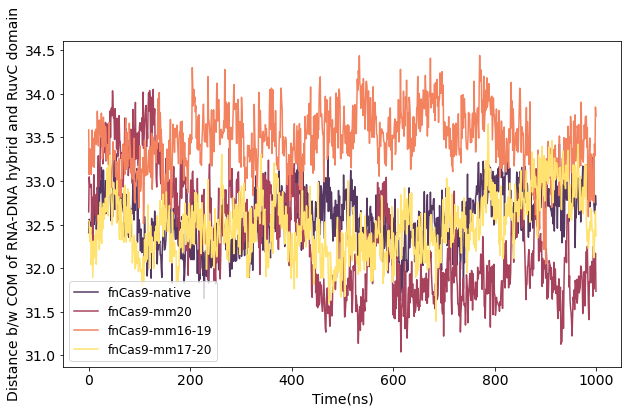

In [76]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
fn_hy_ruvc.plot(color=color_dict)
plt.legend(['fnCas9-native','fnCas9-mm20','fnCas9-mm16-19','fnCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and RuvC domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

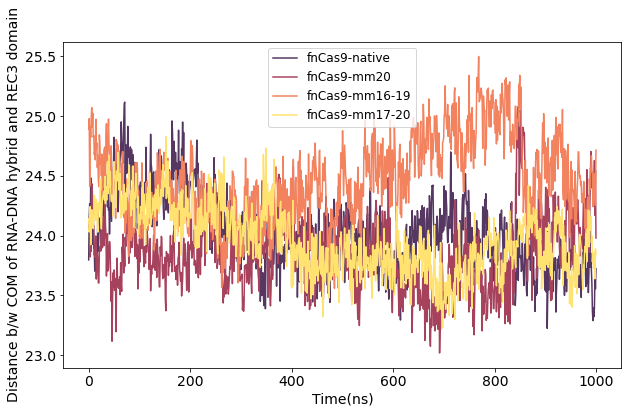

In [77]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
fn_hy_rec3.plot(color=color_dict)
plt.legend(['fnCas9-native','fnCas9-mm20','fnCas9-mm16-19','fnCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and REC3 domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

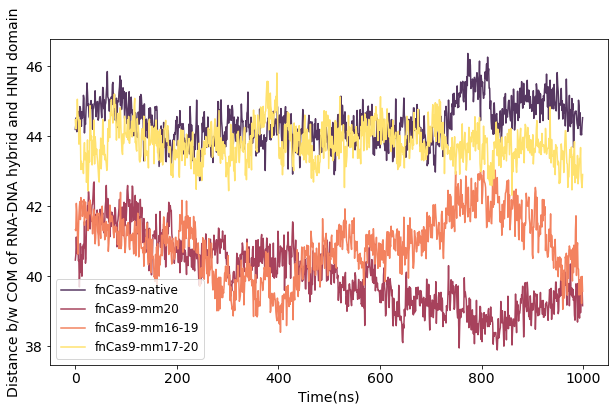

In [78]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
fn_hy_hnh.plot(color=color_dict)
plt.legend(['fnCas9-native','fnCas9-mm20','fnCas9-mm16-19','fnCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

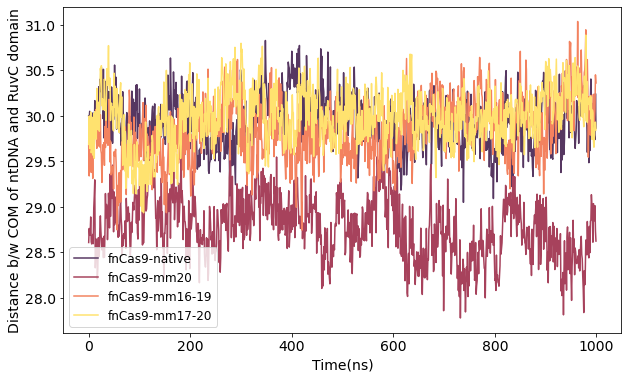

In [79]:

fn_nt_ruvc.plot(color=color_dict)
plt.legend(['fnCas9-native','fnCas9-mm20','fnCas9-mm16-19','fnCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of ntDNA and RuvC domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

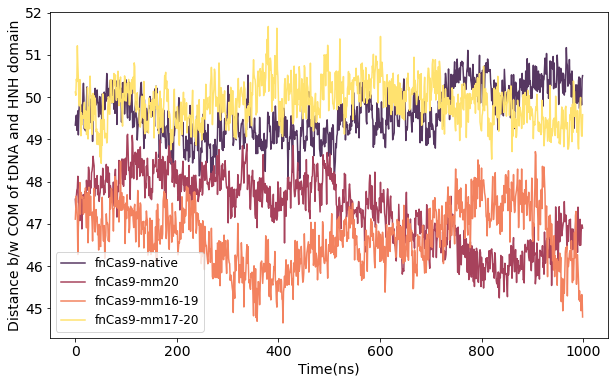

In [80]:
fn_td_hnh.plot(color=color_dict)
plt.legend(['fnCas9-native','fnCas9-mm20','fnCas9-mm16-19','fnCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of tDNA and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [8]:
fn1_ruvc=pd.read_csv('fn_nodt_files/ruvc-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_ruvc=pd.read_csv('fn_nodt_files/ruvc-hyrbid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_ruvc=pd.read_csv('fn_nodt_files/ruvc-hyrbid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_ruvc=pd.read_csv('fn_nodt_files/ruvc-hyrbid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_ruvc.columns=['Frame','Fn-native-ruvc','Fn-non-native-ruvc']
fn2_ruvc.columns=['Frame','Fn-mm20-ruvc','Fn-mm20-non-native-ruvc']
fn3_ruvc.columns=['Frame','Fn-mm16_19-ruvc','Fn-mm16_19-non-native-ruvc']
fn4_ruvc.columns=['Frame','Fn-mm17-20-ruvc','Fn-mm17-20-non-native-ruvc']

fn1_hnh=pd.read_csv('fn_nodt_files/hnh-hybrid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_hnh=pd.read_csv('fn_nodt_files/hnh-hybrid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_hnh=pd.read_csv('fn_nodt_files/hnh-hybrid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_hnh=pd.read_csv('fn_nodt_files/hnh-hybrid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_hnh.columns=['Frame','Fn-native-hnh','Fn-non-native-hnh']
fn2_hnh.columns=['Frame','Fn-mm20-hnh','Fn-mm20-non-native-hnh']
fn3_hnh.columns=['Frame','Fn-mm16_19-hnh','Fn-mm16_19-non-native-hnh']
fn4_hnh.columns=['Frame','Fn-mm17-20-hnh','Fn-mm17-20-non-native-hnh']

fn1_rec1=pd.read_csv('fn_nodt_files/rec1-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_rec1=pd.read_csv('fn_nodt_files/rec1-hyrbid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_rec1=pd.read_csv('fn_nodt_files/rec1-hyrbid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_rec1=pd.read_csv('fn_nodt_files/rec1-hyrbid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_rec1.columns=['Frame','Fn-native-rec1','Fn-non-native-rec1']
fn2_rec1.columns=['Frame','Fn-mm20-rec1','Fn-mm20-non-native-rec1']
fn3_rec1.columns=['Frame','Fn-mm16_19-rec1','Fn-mm16_19-non-native-rec1']
fn4_rec1.columns=['Frame','Fn-mm17-20-rec1','Fn-mm17-20-non-native-rec1']

fn1_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_rec3.columns=['Frame','Fn-native-rec3','Fn-non-native-rec3']
fn2_rec3.columns=['Frame','Fn-mm20-rec3','Fn-mm20-non-native-rec3']
fn3_rec3.columns=['Frame','Fn-mm16_19-rec3','Fn-mm16_19-non-native-rec3']
fn4_rec3.columns=['Frame','Fn-mm17-20-rec3','Fn-mm17-20-non-native-rec3']

fn1_rec2=pd.read_csv('fn_nodt_files/rec2-hybrid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_rec2=pd.read_csv('fn_nodt_files/rec2-hybrid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_rec2=pd.read_csv('fn_nodt_files/rec2-hybrid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_rec2=pd.read_csv('fn_nodt_files/rec2-hybrid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_rec2.columns=['Frame','Fn-native-rec2','Fn-non-native-rec2']
fn2_rec2.columns=['Frame','Fn-mm20-rec2','Fn-mm20-non-native-rec2']
fn3_rec2.columns=['Frame','Fn-mm16_19-rec2','Fn-mm16_19-non-native-rec2']
fn4_rec2.columns=['Frame','Fn-mm17-20-rec2','Fn-mm17-20-non-native-rec2']

fn1_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
fn2_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm20.csv').reset_index(drop=True)
fn3_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm16_19.csv').reset_index(drop=True)
fn4_rec3=pd.read_csv('fn_nodt_files/rec3-hyrbid-count_nodt_fnmm17-20.csv').reset_index(drop=True)

fn1_rec3.columns=['Frame','Fn-native-rec3','Fn-non-native-rec3']
fn2_rec3.columns=['Frame','Fn-mm20-rec3','Fn-mm20-non-native-rec3']
fn3_rec3.columns=['Frame','Fn-mm16_19-rec3','Fn-mm16_19-non-native-rec3']
fn4_rec3.columns=['Frame','Fn-mm17-20-rec3','Fn-mm17-20-non-native-rec3']

In [9]:
rec1=fn1_rec1.merge(fn2_rec1, on = 'Frame', how="inner").merge(fn3_rec1, on = 'Frame', how="inner").merge(fn4_rec1, on = 'Frame', how="inner")


In [10]:
rec2=fn1_rec2.merge(fn2_rec2, on = 'Frame', how="inner").merge(fn3_rec2, on = 'Frame', how="inner").merge(fn4_rec2, on = 'Frame', how="inner")
rec2.head()

,Frame,Fn-native-rec2,Fn-non-native-rec2,Fn-mm20-rec2,Fn-mm20-non-native-rec2,Fn-mm16_19-rec2,Fn-mm16_19-non-native-rec2,Fn-mm17-20-rec2,Fn-mm17-20-non-native-rec2
0,1,66,0,174,0,111,0,145,0
1,2,45,44,114,28,79,16,125,50
2,3,46,30,130,55,69,24,104,44
3,4,47,53,134,53,72,35,95,28
4,5,44,84,112,49,58,19,118,60


In [11]:
ruvc=fn1_ruvc.merge(fn2_ruvc, on = 'Frame', how="inner").merge(fn3_ruvc, on = 'Frame', how="inner").merge(fn4_ruvc, on = 'Frame', how="inner")
ruvc.head()

,Frame,Fn-native-ruvc,Fn-non-native-ruvc,Fn-mm20-ruvc,Fn-mm20-non-native-ruvc,Fn-mm16_19-ruvc,Fn-mm16_19-non-native-ruvc,Fn-mm17-20-ruvc,Fn-mm17-20-non-native-ruvc
0,1,177,0,126,0,214,0,121,0
1,2,140,55,83,41,145,38,104,52
2,3,140,46,98,29,128,29,107,33
3,4,135,65,95,20,148,62,114,75
4,5,134,48,82,37,151,85,109,69


In [12]:
hnh=fn1_hnh.merge(fn2_hnh, on = 'Frame', how="inner").merge(fn3_hnh, on = 'Frame', how="inner").merge(fn4_hnh, on = 'Frame', how="inner")
hnh.head()

,Frame,Fn-native-hnh,Fn-non-native-hnh,Fn-mm20-hnh,Fn-mm20-non-native-hnh,Fn-mm16_19-hnh,Fn-mm16_19-non-native-hnh,Fn-mm17-20-hnh,Fn-mm17-20-non-native-hnh
0,1,203,0,137,0,154,0,244,0
1,2,149,50,83,45,105,56,181,50
2,3,133,37,102,77,102,38,137,97
3,4,96,37,87,56,115,52,114,64
4,5,114,23,103,73,88,35,138,61


In [13]:
rec3=fn1_rec3.merge(fn2_rec3, on = 'Frame', how="inner").merge(fn3_rec3, on = 'Frame', how="inner").merge(fn4_rec3, on = 'Frame', how="inner")
rec3.head()

,Frame,Fn-native-rec3,Fn-non-native-rec3,Fn-mm20-rec3,Fn-mm20-non-native-rec3,Fn-mm16_19-rec3,Fn-mm16_19-non-native-rec3,Fn-mm17-20-rec3,Fn-mm17-20-non-native-rec3
0,1,948,0,941,0,1170,0,1107,0
1,2,743,255,704,228,837,249,876,307
2,3,712,288,668,314,856,229,813,320
3,4,675,354,657,274,839,260,805,357
4,5,682,359,631,278,883,304,878,308


In [14]:
ruvc=ruvc.iloc[25000:45000,:]
hnh=hnh.iloc[25000:45000,:]
rec1=rec1.iloc[25000:45000,:]
rec2=rec2.iloc[25000:45000,:]
rec3=rec3.iloc[25000:45000,:]

In [18]:
!mkdir figures/native-fn

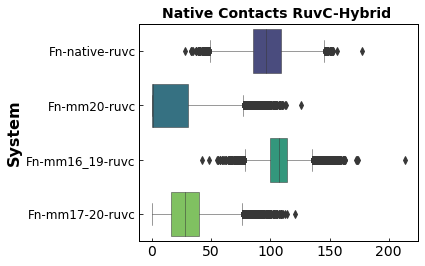

In [19]:
sns.boxplot(data=ruvc[['Fn-native-ruvc','Fn-mm20-ruvc','Fn-mm16_19-ruvc','Fn-mm17-20-ruvc']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts RuvC-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_ruvc_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

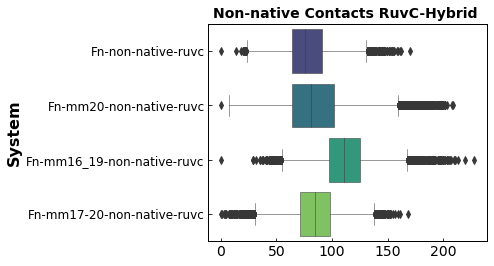

In [22]:
sns.boxplot(data=ruvc[['Fn-non-native-ruvc','Fn-mm20-non-native-ruvc','Fn-mm16_19-non-native-ruvc','Fn-mm17-20-non-native-ruvc']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts RuvC-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_ruvc_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

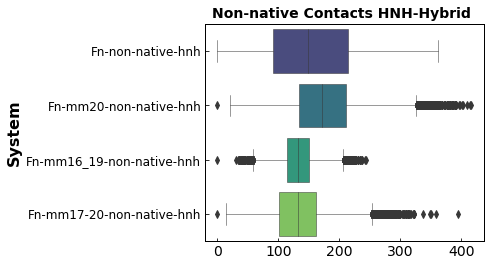

In [21]:
sns.boxplot(data=hnh[['Fn-non-native-hnh','Fn-mm20-non-native-hnh','Fn-mm16_19-non-native-hnh','Fn-mm17-20-non-native-hnh']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts HNH-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_HNH_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

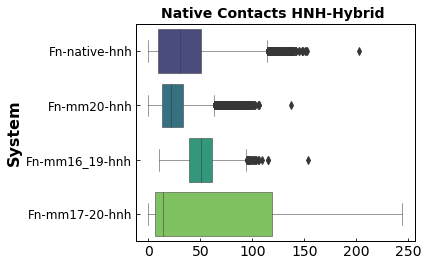

In [23]:
sns.boxplot(data=hnh[['Fn-native-hnh','Fn-mm20-hnh','Fn-mm16_19-hnh','Fn-mm17-20-hnh']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts HNH-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_hnh_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [82]:
rec2.head()

,Frame,Fn-native-rec2,Fn-non-native-rec2,Fn-mm20-rec2,Fn-mm20-non-native-rec2,Fn-mm16_19-rec2,Fn-mm16_19-non-native-rec2,Fn-mm17-20-rec2,Fn-mm17-20-non-native-rec2
25000,25001,598,1120,634,1279,798,1284,790,1520
25001,25002,602,1280,626,1252,773,1256,788,1589
25002,25003,595,1275,597,1301,739,1214,759,1457
25003,25004,619,1363,634,1359,784,1308,747,1485
25004,25005,598,1399,617,1361,762,1251,733,1502


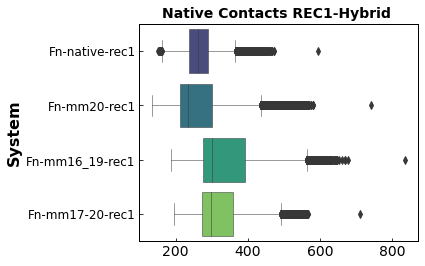

In [24]:
sns.boxplot(data=rec1[['Fn-native-rec1','Fn-mm20-rec1','Fn-mm16_19-rec1','Fn-mm17-20-rec1']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC1-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec1-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

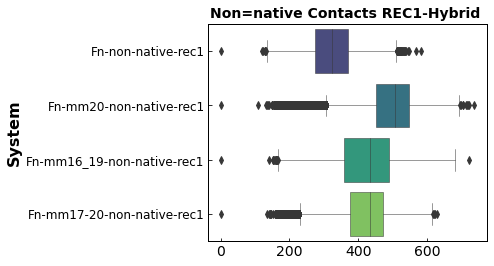

In [25]:
sns.boxplot(data=rec1[['Fn-non-native-rec1','Fn-mm20-non-native-rec1','Fn-mm16_19-non-native-rec1','Fn-mm17-20-non-native-rec1']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non=native Contacts REC1-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec1_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

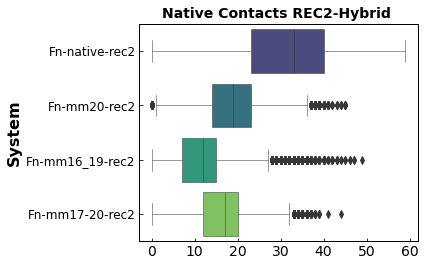

In [15]:
sns.boxplot(data=rec2[['Fn-native-rec2','Fn-mm20-rec2','Fn-mm16_19-rec2','Fn-mm17-20-rec2']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC2-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec2_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

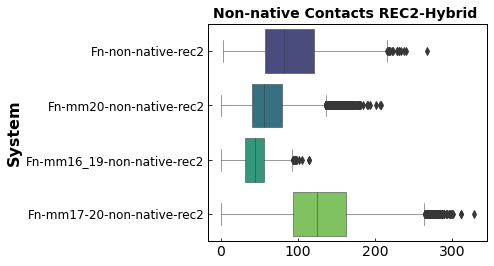

In [16]:
sns.boxplot(data=rec2[['Fn-non-native-rec2','Fn-mm20-non-native-rec2','Fn-mm16_19-non-native-rec2','Fn-mm17-20-non-native-rec2']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts REC2-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec2_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [86]:
rec3.head()

,Frame,Fn-native-rec3,Fn-non-native-rec3,Fn-mm20-rec3,Fn-mm20-non-native-rec3,Fn-mm16_19-rec3,Fn-mm16_19-non-native-rec3,Fn-mm17-20-rec3,Fn-mm17-20-non-native-rec3
0,1,948,0,941,0,1170,0,1107,0
1,2,743,255,704,228,837,249,876,307
2,3,712,288,668,314,856,229,813,320
3,4,675,354,657,274,839,260,805,357
4,5,682,359,631,278,883,304,878,308


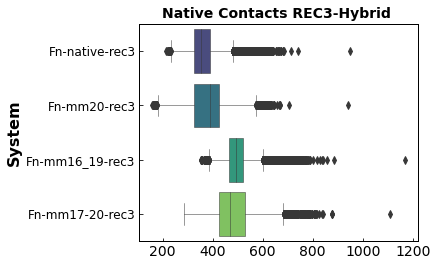

In [28]:
sns.boxplot(data=rec3[['Fn-native-rec3','Fn-mm20-rec3','Fn-mm16_19-rec3','Fn-mm17-20-rec3']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC3-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec3_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

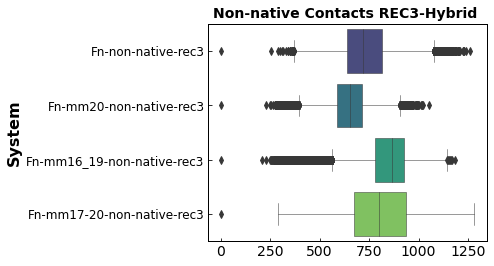

In [29]:
sns.boxplot(data=rec3[['Fn-non-native-rec3','Fn-mm20-non-native-rec3','Fn-mm16_19-non-native-rec3','Fn-mm17-20-non-native-rec3']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts REC3-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/FnCas9_all_rec3_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [21]:
# COmpare distribtuion of PC1 of all dataframes
import pandas as pd
from scipy.stats import mannwhitneyu
import pandas as pd
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df1, df2, col_name_1, col_name_2, alpha=0.05):
    # Extract the data as NumPy arrays from the DataFrames
    data1 = df1[col_name_1].values
    data2 = df2[col_name_2].values

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

    # Determine the significance based on the p-value
    if p_value < alpha:
        significance_msg = 'Reject the null hypothesis: There is a significant difference between the datasets.'
    else:
        significance_msg = 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'

    # Create a dictionary to store the results
    result_dict = {
        'Mann-Whitney U Statistic': statistic,
        'p-value': p_value,
        'Significance Message': significance_msg
    }

    return result_dict

In [36]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_hybrid.csv') 
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 571974.0, 'p-value': 2.494565258672702e-08, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 492070.0, 'p-value': 0.7594989374514427, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 524723.0, 'p-value': 0.05555399558277963, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 418314.0, 'p-value': 1.4278412139940188e-09, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 423959.0, 'p-value': 3.894812350192391e-09,

In [37]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_HNH.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 464999.0, 'p-value': 0.006719207042122523, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 508256.0, 'p-value': 0.339679112372148, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 410909.0, 'p-value': 5.2297720503983685e-12, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 482690.0, 'p-value': 0.29977578292870466, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 577624.0, 'p-value': 1.8416885227234863e-09, 

In [38]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_RuvC.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 508414.0, 'p-value': 0.5146953565483536, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 509908.0, 'p-value': 0.27858512250345424, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 481177.0, 'p-value': 0.1449452528006588, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 488998.0, 'p-value': 0.585429133007979, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 510904.0, 'p-value': 0.3984624507

In [39]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_REC1.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 442423.0, 'p-value': 8.244209486891002e-06, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 506298.0, 'p-value': 0.42240492683221453, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 505987.0, 'p-value': 0.6429369258944214, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 471378.0, 'p-value': 0.055084671732670426, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 499026.0, 'p-value': 0.9399058944135

In [40]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_REC2.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 515564.0, 'p-value': 0.22810979511950424, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 459888.0, 'p-value': 0.004902538827906768, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 490011.0, 'p-value': 0.43921911669894276, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 475076.0, 'p-value': 0.10307939317297847, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 495358.0, 'p-value': 0.71926655740993

In [41]:
df1=pd.read_csv('Fn_NA_csvs/Fn_PCA_PCs_REC3.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Fn_native']
mm20=df1[df1['Label']=='Fn_mm20']
mm16_19=df1[df1['Label']=='Fn_mm16_19']
mm17_20=df1[df1['Label']=='Fn_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 515768.0, 'p-value': 0.2220708462955847, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 482554.0, 'p-value': 0.2948645147632327, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 528003.0, 'p-value': 0.0301189728263955, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 528698.0, 'p-value': 0.01085316141244602, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 496847.0, 'p-value': 0.8071296934194312, 'Signific